### DETECT BRANCHES DEBUG : 

In [192]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_branches_new(mask):
    blurred_mask = cv2.GaussianBlur(mask, (7, 7), 0)  # Smoothing to reduce noise

    # Detect edges
    edges = cv2.Canny(blurred_mask, 70, 100)

    # Detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=20)
    branches = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(y2 - y1) < 5:  # Horizontal line condition
                    branches.append((x1, y1, x2, y2))
        # Visualization using Matplotlib
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(blurred_mask, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Blurred Mask")
    ax[0].axis("off")

    ax[1].imshow(edges, cmap="gray")
    ax[1].set_title("Edges")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()

    return branches

def detect_branches_in_roi_hough_new(frame, roi_coords):
    # Extract the ROI
    x, y, w, h = roi_coords
    roi = frame[y:y + h, x:x + w]

    # Preprocess the ROI for line detection
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi_thresh = cv2.threshold(roi_gray, 65, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    roi_refined = cv2.morphologyEx(roi_thresh, cv2.MORPH_CLOSE, kernel)

    # Detect branches using both line and color conditions
    branches = detect_branches_new(roi_refined)


    # Draw detected branches on the ROI
    roi_with_branches = roi.copy()
    for x1, y1, x2, y2 in branches:
        cv2.line(roi_with_branches, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Visualization using Matplotlib
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original ROI")
    ax[0].axis("off")

    ax[1].imshow(roi_thresh, cmap="gray")
    ax[1].set_title("Binary Threshold (Inverted)")
    ax[1].axis("off")

    ax[2].imshow(cv2.cvtColor(roi_with_branches, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Detected Branches")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()
    
    if branches:
        print(f"Branches Detected: {branches}")
        return True
    else:
        print("No branches detected.")
        return False

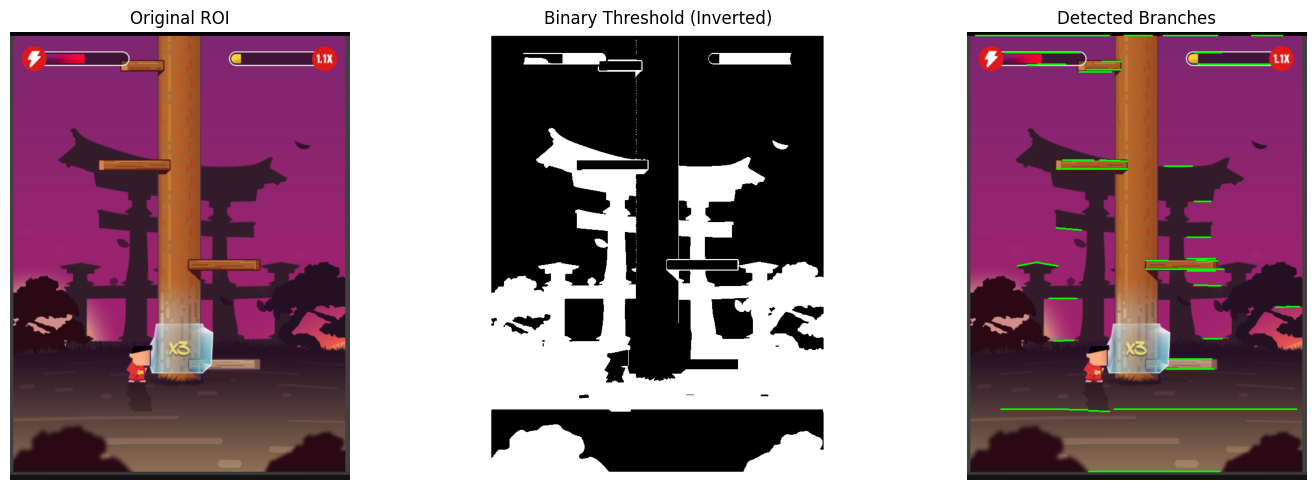

Branches Detected: [(15, 6, 258, 6), (266, 684, 597, 684), (67, 37, 204, 37), (220, 797, 458, 797), (418, 58, 549, 58), (323, 430, 465, 430), (162, 248, 290, 248), (323, 414, 364, 414), (367, 593, 443, 593), (361, 611, 447, 611), (398, 6, 454, 6), (399, 433, 450, 433), (398, 411, 450, 411), (148, 483, 199, 483), (173, 232, 229, 232), (415, 414, 454, 415), (161, 355, 207, 359), (149, 684, 218, 685), (156, 560, 193, 559), (515, 6, 571, 6), (109, 59, 144, 58), (217, 68, 279, 68), (203, 72, 261, 72), (357, 243, 408, 243), (99, 684, 148, 684), (429, 556, 462, 556), (220, 687, 258, 688), (61, 684, 98, 684), (411, 37, 461, 37), (145, 58, 178, 58), (398, 372, 441, 372), (411, 459, 460, 460), (355, 6, 397, 6), (284, 6, 335, 6), (244, 53, 279, 53), (127, 418, 164, 424), (411, 307, 442, 307), (91, 424, 129, 417), (240, 232, 290, 234), (559, 499, 602, 498)]


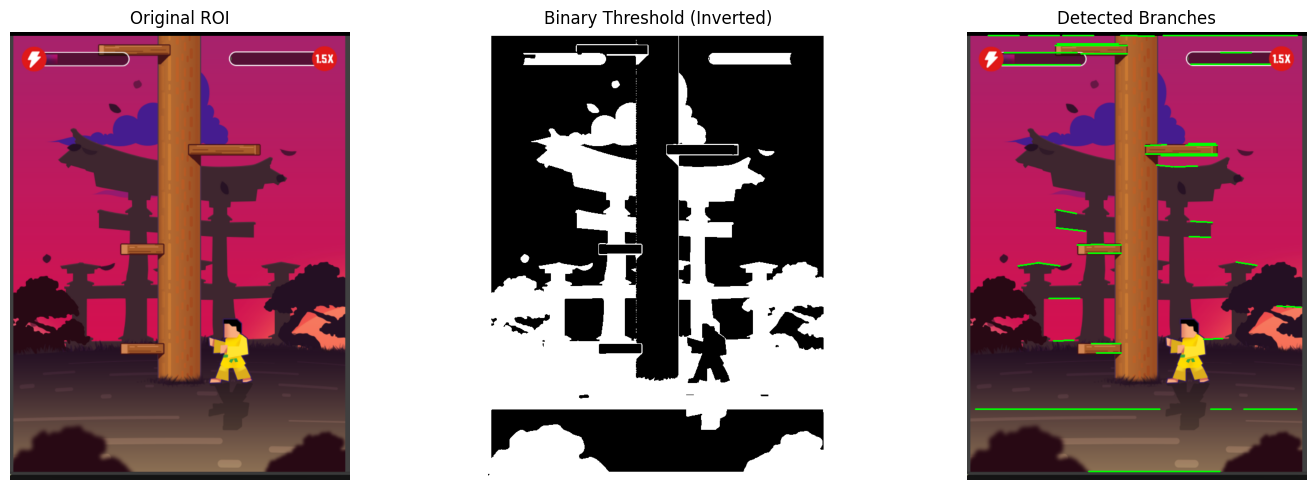

Branches Detected: [(355, 6, 598, 6), (15, 684, 349, 684), (220, 797, 458, 797), (67, 37, 199, 37), (405, 58, 549, 58), (64, 59, 205, 59), (323, 221, 453, 221), (159, 24, 290, 24), (351, 224, 453, 224), (206, 39, 290, 39), (148, 483, 204, 483), (163, 21, 274, 21), (396, 205, 453, 205), (501, 684, 557, 684), (322, 206, 361, 204), (234, 582, 279, 582), (441, 684, 478, 684), (401, 202, 450, 202), (459, 37, 515, 37), (111, 6, 167, 6), (38, 6, 94, 6), (225, 565, 278, 565), (219, 401, 279, 401), (156, 560, 193, 559), (428, 557, 463, 556), (173, 6, 229, 6), (161, 355, 214, 361), (375, 244, 417, 243), (249, 386, 279, 386), (278, 6, 339, 7), (402, 371, 441, 372), (126, 418, 168, 424), (343, 241, 373, 244), (405, 343, 444, 345), (199, 386, 248, 385), (561, 497, 605, 499), (487, 417, 525, 423), (558, 684, 597, 684), (92, 424, 132, 418), (162, 322, 198, 329)]


True

In [25]:
frame = cv2.imread('C://Users//shaym//Downloads//game_screen_18.png')  
character_template_2 = cv2.imread('character_template_2.png') 
new_frame = cv2.imread("saved_regions\game_region_20250104-161556.png")
new_frame_2 = cv2.imread("saved_regions\game_region_20250104-152136.png")

height, width, _ = new_frame.shape 
frame_coords = (0, 0, width, height) 

height_2, width_2 , _ = new_frame_2.shape
frame_coords_2 = (0,0,width_2,height_2)
"""locate_player_and_define_rois(frame, character_template_2)
detect_branches_in_roi_hough_new(frame, LEFT_ROI)
detect_branches_in_roi_hough_new(frame, RIGHT_ROI)"""

detect_branches_in_roi_hough_new(new_frame,frame_coords)
detect_branches_in_roi_hough_new(new_frame_2, frame_coords_2)

### END

### DETECT NUMBER DEBUG

In [254]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_number_in_center_roi_with_debugging(center_roi, ref_images, threshold = 75.0):
    """
    Detects the number in the center ROI using ORB feature matching and visualizes each step.

    Parameters:
    center_roi (numpy.ndarray): The center ROI of the image.
    ref_images (dict): Dictionary of reference images with keys as numbers (e.g., {2, 3, 4}).

    Returns:
    tuple: The detected number and the match percentage.
    """
    # Initialize ORB detector
    orb = cv2.ORB_create(nfeatures=2000, scaleFactor=1.2, nlevels=8, edgeThreshold=15, patchSize=31)

    # Detect keypoints and descriptors for the center ROI
    kp1, des1 = orb.detectAndCompute(center_roi, None)

    if des1 is None:
        print("No keypoints detected in the center ROI.")
        return None, 0

    best_match = None
    best_score = 0
    all_results = []

    # BFMatcher with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Iterate over reference images
    for number, ref_image_list in ref_images.items():
        for ref_image in ref_image_list: 
        # Detect keypoints and descriptors for the reference image
          kp2, des2 = orb.detectAndCompute(ref_image, None)
  
          if des2 is None:
              print(f"No keypoints detected in the reference image for number {number}.")
              continue
  
          # Match descriptors
          matches = bf.match(des1, des2)
  
          # Sort matches by distance
          matches = sorted(matches, key=lambda x: x.distance)
  
          # Calculate the match percentage
          match_percentage = len(matches) / min(len(kp1), len(kp2)) * 100
          all_results.append((number, match_percentage, matches, ref_image, kp2))
  
          print(f"Number {number} - Match Percentage: {match_percentage:.2f}%")
  
          # Keep track of the best match
          if match_percentage > best_score:
              best_score = match_percentage
              best_match = number

    # Visualization of the best match
    for number, match_percentage, matches, ref_image, kp2 in all_results:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f"Number {number} - Match Percentage: {match_percentage:.2f}%", fontsize=16)

        # Original center ROI
        axes[0].imshow(cv2.cvtColor(center_roi, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Center ROI")
        axes[0].axis("off")

        # Reference image
        axes[1].imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))
        axes[1].set_title(f"Reference Image: {number}")
        axes[1].axis("off")

        # Matches
        match_img = cv2.drawMatches(center_roi, kp1, ref_image, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        axes[2].imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
        axes[2].set_title(f"Top 20 Matches (Number {number})")
        axes[2].axis("off")

        plt.tight_layout()
        plt.show()

    return best_match > threshold, best_score

In [266]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_number_in_center_roi_with_knn(center_roi, ref_images, threshold=75.0):
    """
    Detects the number in the center ROI using ORB feature matching with KNN and visualizes each step.

    Parameters:
    center_roi (numpy.ndarray): The center ROI of the image.
    ref_images (dict): Dictionary of reference images with keys as numbers (e.g., {2, 3, 4}).

    Returns:
    tuple: The detected number and the match percentage.
    """
    # Initialize ORB detector
    orb = cv2.ORB_create(nfeatures=1500, scaleFactor=1.2, nlevels=8, edgeThreshold=15, patchSize=31)

    # Detect keypoints and descriptors for the center ROI
    kp1, des1 = orb.detectAndCompute(center_roi, None)

    if des1 is None:
        print("No keypoints detected in the center ROI.")
        return None, 0

    best_match = None
    best_score = 0
    all_results = []

    # BFMatcher with Hamming distance for KNN matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    # Iterate over reference images
    for number, ref_image_list in ref_images.items():
        for ref_image in ref_image_list:
            # Detect keypoints and descriptors for the reference image
            kp2, des2 = orb.detectAndCompute(ref_image, None)

            if des2 is None:
                print(f"No keypoints detected in the reference image for number {number}.")
                continue

            # Match descriptors using KNN
            matches = bf.knnMatch(des1, des2, k=2)

            # Apply Lowe's ratio test
            good_matches = [m for m, n in matches if len(matches) > 1 and m.distance < 0.7 * n.distance]

            # Calculate match percentage
            match_percentage = len(good_matches) / min(len(kp1), len(kp2)) * 100 if kp1 and kp2 else 0
            all_results.append((number, match_percentage, good_matches, ref_image, kp2))

            print(f"Number {number} - Match Percentage: {match_percentage:.2f}%")

            # Keep track of the best match
            if match_percentage > best_score:
                best_score = match_percentage
                best_match = number

    # Visualization of the best match
    for number, match_percentage, matches, ref_image, kp2 in all_results:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f"Number {number} - Match Percentage: {match_percentage:.2f}%", fontsize=16)

        # Original center ROI
        axes[0].imshow(cv2.cvtColor(center_roi, cv2.COLOR_BGR2RGB))
        axes[0].set_title("Center ROI")
        axes[0].axis("off")

        # Reference image
        axes[1].imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))
        axes[1].set_title(f"Reference Image: {number}")
        axes[1].axis("off")

        # Matches
        match_img = cv2.drawMatchesKnn(center_roi, kp1, ref_image, kp2, [matches[:20]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        axes[2].imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
        axes[2].set_title(f"Top Matches (Number {number})")
        axes[2].axis("off")

        plt.tight_layout()
        plt.show()

    return best_match, best_score


Number 2 - Match Percentage: 0.00%
Number 2 - Match Percentage: 0.00%
Number 2 - Match Percentage: 0.00%
Number 3 - Match Percentage: 81.32%
Number 3 - Match Percentage: 75.00%
Number 3 - Match Percentage: 79.07%
Number 4 - Match Percentage: 0.00%
Number 4 - Match Percentage: 0.00%
Number 4 - Match Percentage: 1.11%


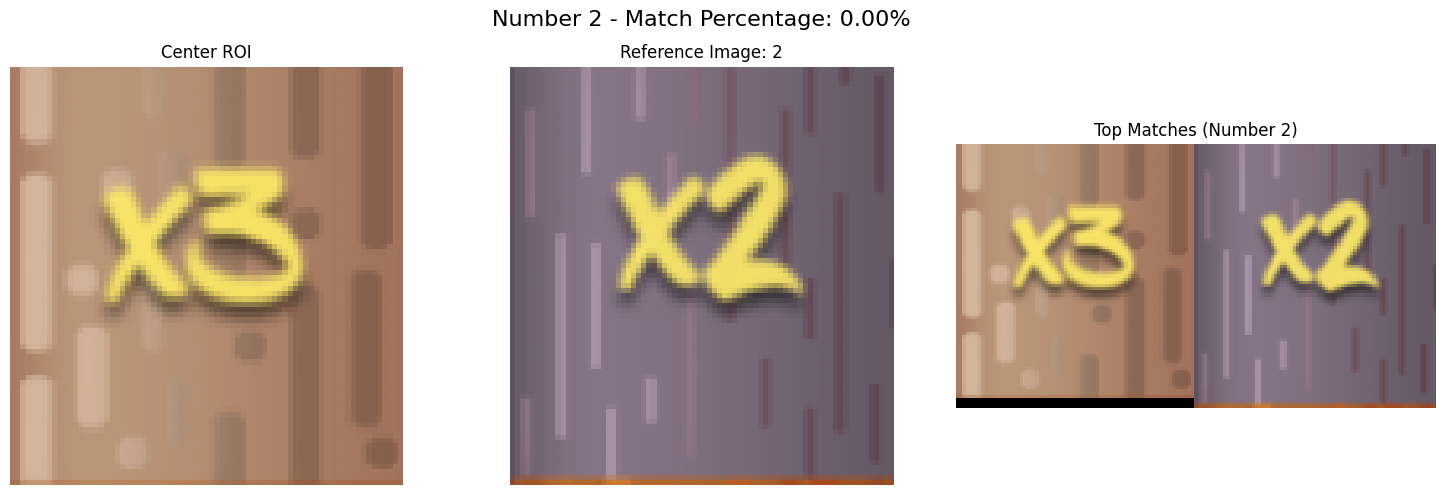

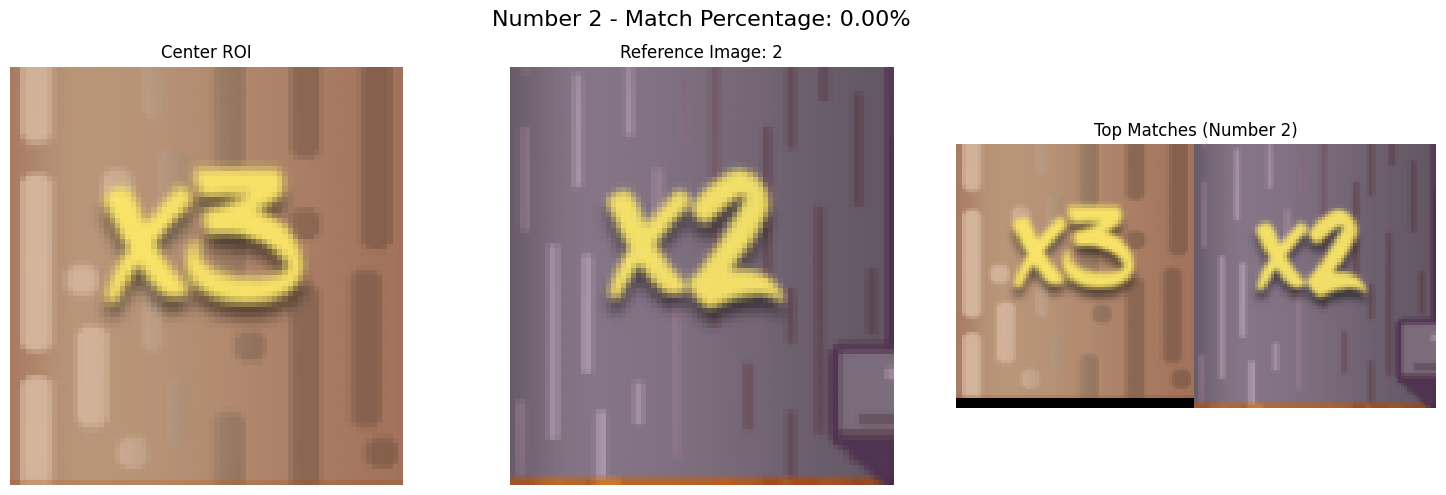

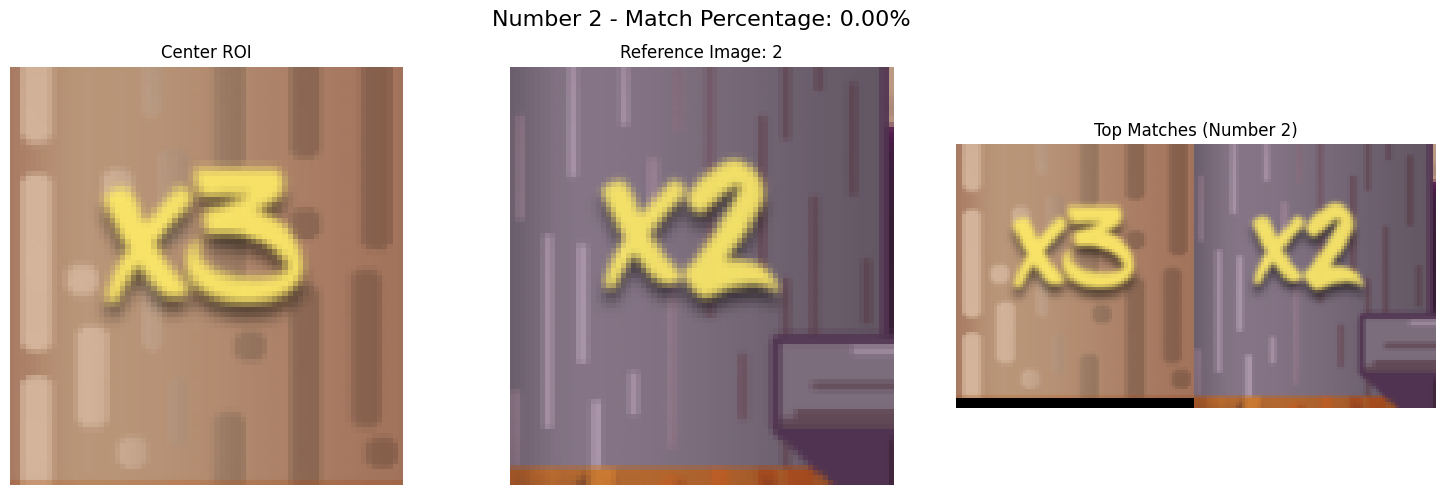

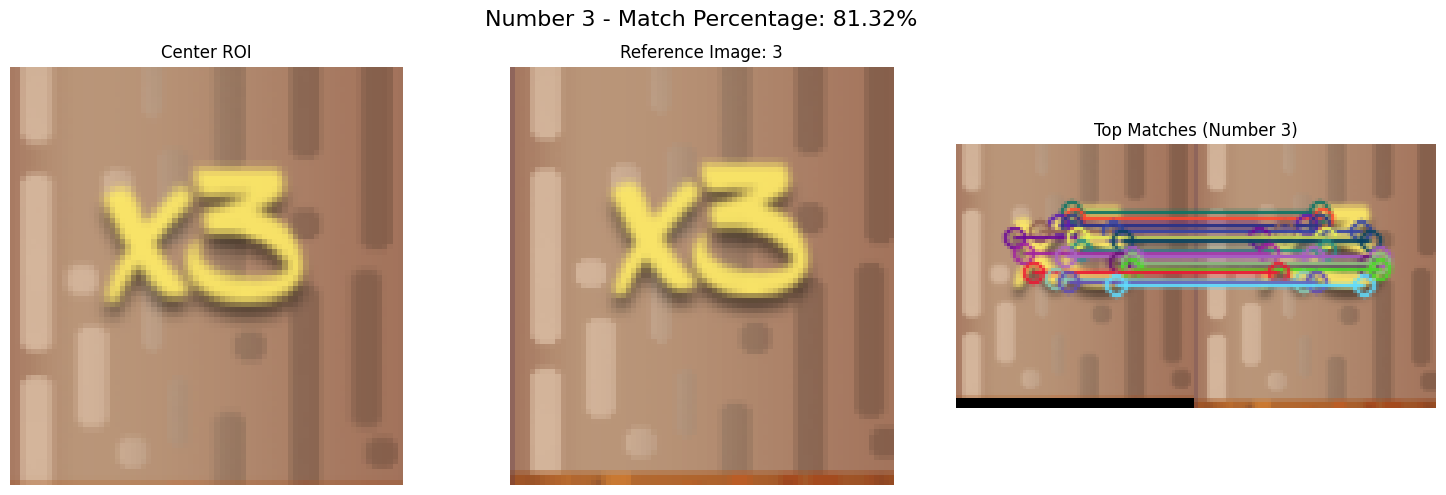

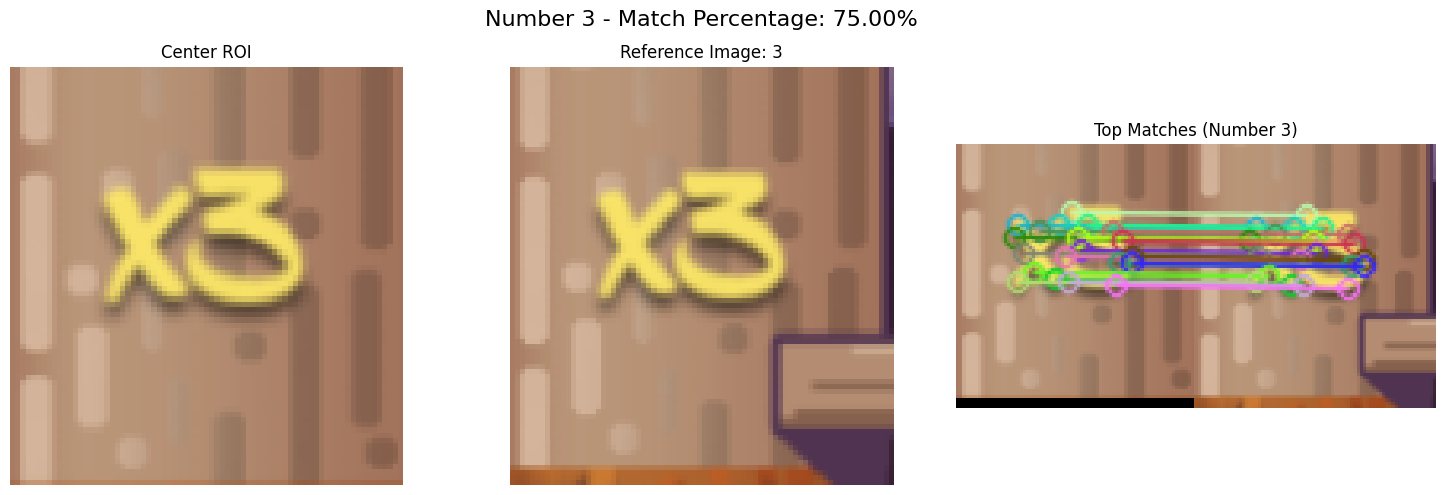

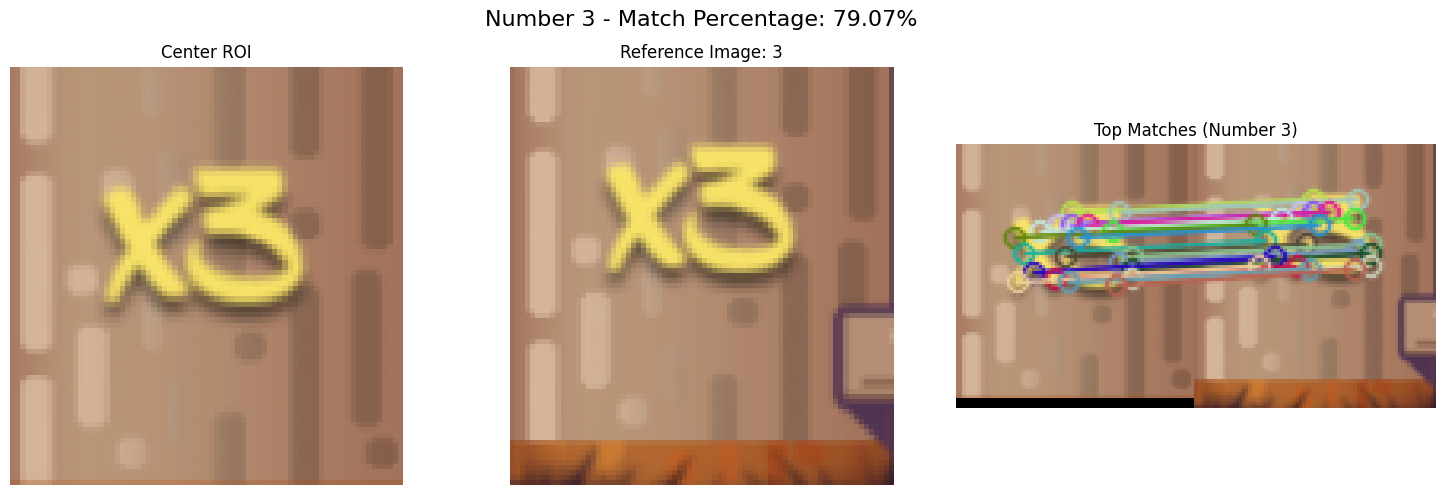

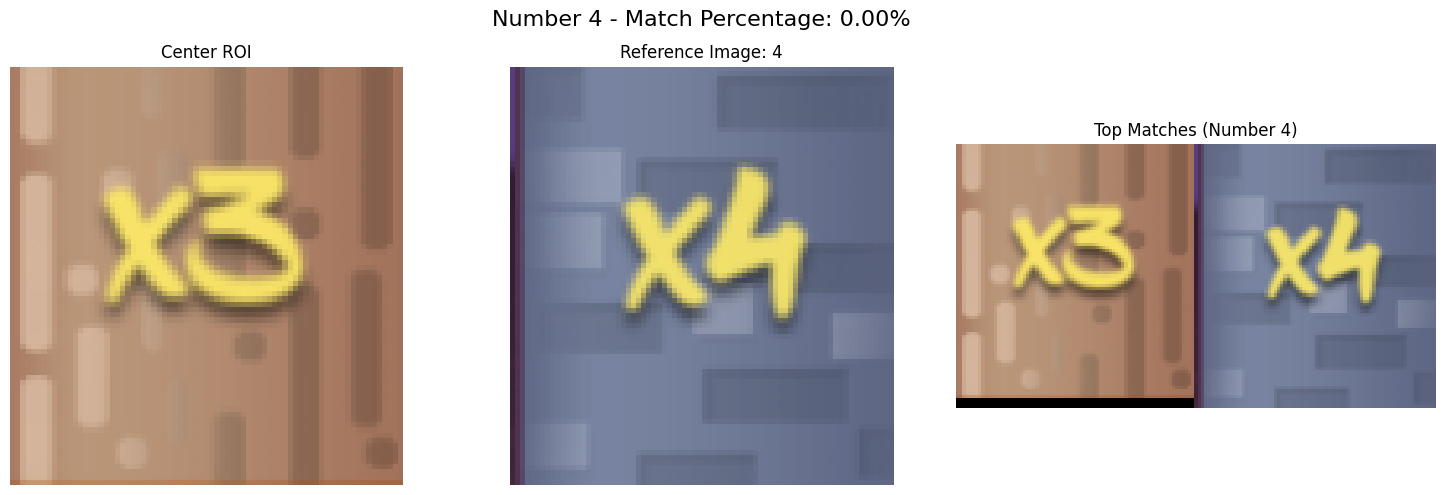

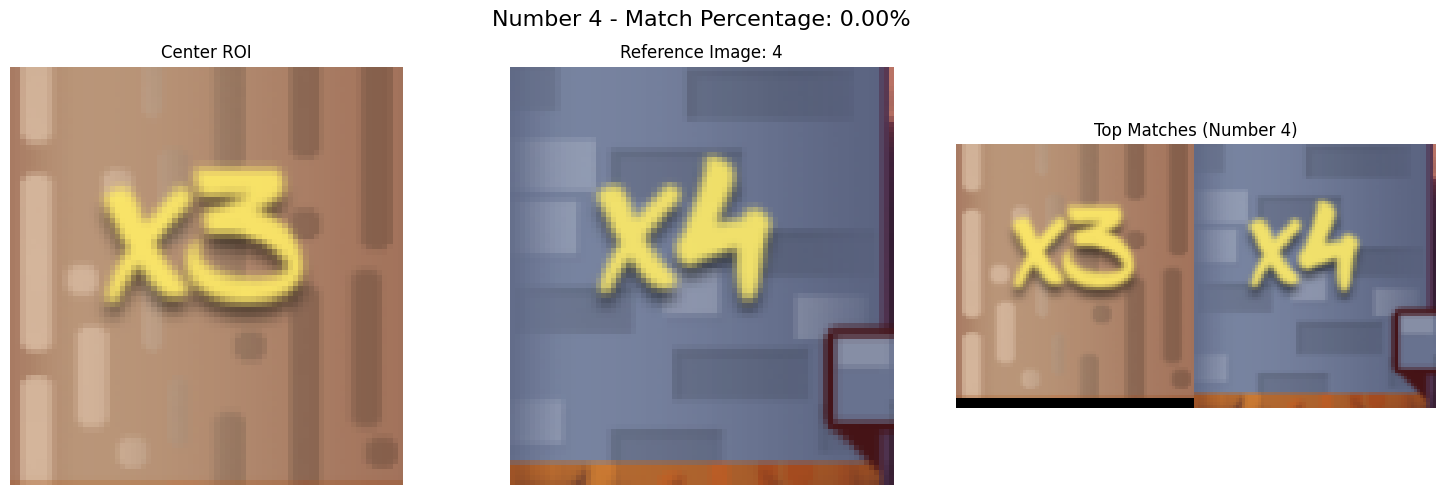

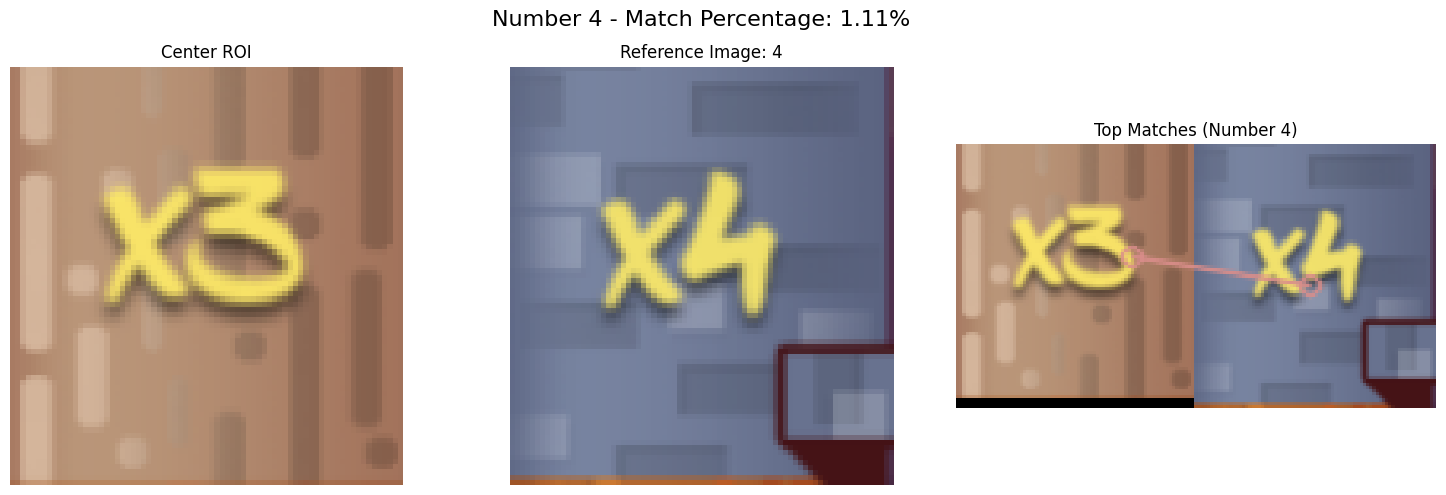

Detected Number: 3 with 81.32% match.


In [282]:
# Load the center ROI (e.g., extracted from your main image)
center_roi = cv2.imread('roi_center_3.png')

# Detect the number in the center ROI
detected_number, match_percentage = detect_number_in_center_roi_with_knn(center_roi, numbers_ref_images)

# Output the result
if detected_number:
    print(f"Detected Number: {detected_number} with {match_percentage:.2f}% match.")
else:
    print("No number detected.")


### END

### DETECT LANTERN DEBUG 

In [145]:
def getGreenMask(img):
    """
    Extracts the green mask from an image, displays it using Matplotlib, and returns the mask.

    Parameters:
    img (numpy.ndarray): Input image in BGR format.

    Returns:
    numpy.ndarray: The binary mask of the green regions.
    """
    # Convert the image from BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the green color range in HSV
    lower_green = np.array([35, 50, 50])   # Adjust as needed
    upper_green = np.array([85, 255, 255]) # Adjust as needed

    # Create a mask for the green color
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    
    # Find contours in the mask
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Get the bounding rectangle for the contour
        x, y, w, h = cv2.boundingRect(contour)
        if w > 55 and h > 80:
            # Draw the rectangle for debugging
         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # A valid rectangle is detected (relaxed conditions)
      
    print(f"Bounding Box Coordinates : x: {x}, y: {y}, w: {w}, h: {h}")
    # Visualize the original image and the green mask
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    # Green mask
    ax[1].imshow(green_mask, cmap="gray")
    ax[1].set_title("Green Mask")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()

    return green_mask

Bounding Box Coordinates : x: 143, y: 246, w: 61, h: 92


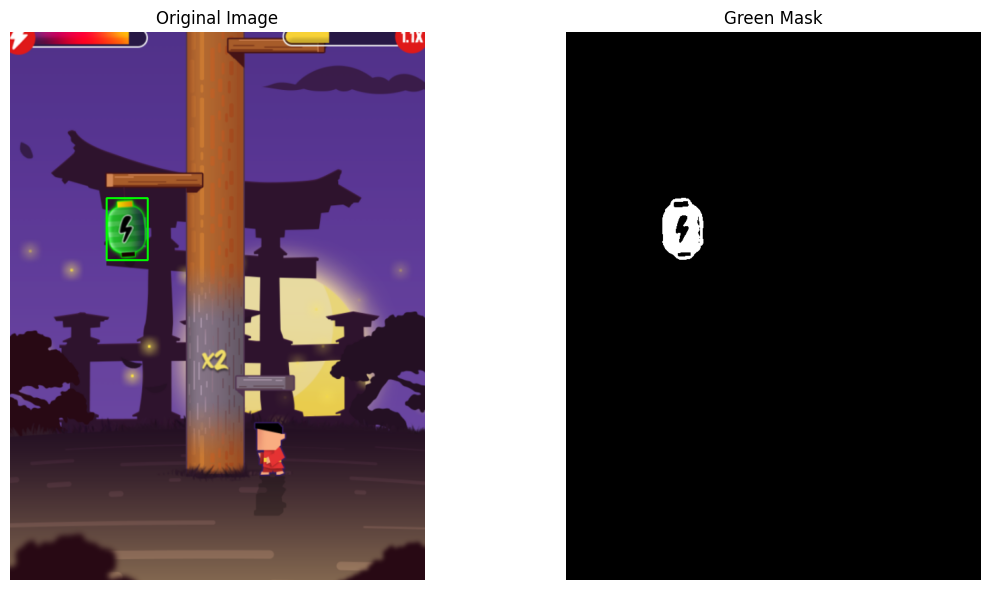

In [161]:
# Load an image
image = cv2.imread("saved_regions\game_region_20250103-203240.png")

if image is not None:
    green_mask = getGreenMask(image)
else:
    print("Error: Could not load the image.")

### END 

### NEW GAME LOOP

In [ ]:
### possible new game loop ### :
in_left = True

def game_loop(frame):
    """
    Main game loop to move the character and detect branches, numbers, or glass panels.
    The game always starts with the character on the left.

    Parameters:
        frame (np.ndarray): The input frame where branch detection is performed.
    """
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, in_left

    # Determine the current ROI based on the position
    current_roi = LEFT_ROI if in_left else RIGHT_ROI
    direction = "left" if in_left else "right"

    # Check for branches above the character
    if detect_branches_in_roi_hough(frame, current_roi):
        # If there are branches, move to the opposite side
        move_character("right" if in_left else "left")
        in_left = not in_left
        return

    # Check if the center ROI is branches-only
    if isBranchOnly(CENTER_ROI):
        # If it's branches-only, continue without action
        print("Branches-only detected. Continuing...")
        return

    # Check if the center ROI contains a number
    detected_number = detect_number_in_center_roi(CENTER_ROI, ref_images)
    if detected_number:
        # Get the detected number
        print(f"Detected number: {detected_number}, Match Percentage: {match_percentage:.2f}%")
        move_character(direction, detected_number)
    else:
        # If it's not branches and not a number, it must be glass
        print("Glass detected.")
        # Hit twice in the safe direction
        move_character(direction, 2)

### END 

# The Final Code (Clean)

In [1]:
import cv2
import numpy as np
import random
import pydirectinput
import mss
import time
from pynput import keyboard
import matplotlib.pyplot as plt
import os 

### process and locate 

In [2]:
def process_and_locate(image_paths, screenshot, scales=( 0.4, 0.5,0.6 , 0.7 , 0.75 , 0.8  , 0.9  , 1.0 , 1.2  , 1.5)):
    """
    Process the screenshot and locate the position of the game window based on reference images.
    Save the minimum threshold smaller than 0.3 and return its game location.
    """
    
    
    reference_images_data = []
    
    for i, path in enumerate(image_paths, start=1):
        ref_image = cv2.imread(path)
        if ref_image is not None:
            label = f"Game Screen {i}"
            reference_images_data.append({"image": ref_image, "label": label})
        else:
            print(f"Error: Could not load {path}")
    
    gray_screenshot = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
    threshold = 0.31
    min_threshold = float('inf')  # Variable to store the smallest threshold
    best_game_location = None  # Variable to store the best game location
    
    for ref in reference_images_data:
        for scale in scales:
            scaled_ref = cv2.resize(ref["image"], None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
            result = cv2.matchTemplate(screenshot, scaled_ref, cv2.TM_SQDIFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            print(f"[DEBUG] Match results for {ref['label']}: Min Val={min_val} , Max Val={max_val}, Min Loc={min_loc}")
            
            if min_val < min_threshold and min_val < threshold:  # Check if this is the new minimum
                min_threshold = min_val
                best_game_location = (min_loc[0], min_loc[1], scaled_ref.shape[1], scaled_ref.shape[0])
    
    # If a valid game location was found, return it
    if best_game_location:
        print(f"[DEBUG] Minimum threshold: {min_threshold}")
        return best_game_location
    
    return None

### Move Character 

In [3]:
def move_character(direction, num_press = 1):
    """
    Simulate key presses to move the character left or right.
    """
    if direction == "left":
        pydirectinput.press('left',_pause = False,presses=num_press)  # Simulates pressing the Left Arrow key
        print("Moving Left")
        
    elif direction == "right":
        pydirectinput.press('right',_pause = False,presses=num_press)  # Simulates pressing the Right Arrow key
        print("Moving Right")

### Match Character Template 

In [278]:
# Global ROI definitions
LEFT_ROI = None
RIGHT_ROI = None
CENTER_ROI = None
LEFT_LANTERN_ROI = None
RIGHT_LANTERN_ROI = None
global located
# Dictionary to store templates and corresponding ROI functions
characters = {
    "player1": {
        "template": cv2.imread("player1_template.png"),
        "roi_function": lambda frame, template: define_rois_for_player1(frame, template)
    },
    "player2": {
        "template": cv2.imread("player2_template.png"),
        "roi_function": lambda frame, template: define_rois_for_player2(frame, template)
    },
    "player3": {
        "template": cv2.imread("player3_template.png"),
        "roi_function": lambda frame, template: define_rois_for_player3(frame, template)
    },
}

def match_character_template(frame, characters):
    """
    Identifies which character template matches the current frame.

    Parameters:
        frame (np.ndarray): The input frame to match.
        characters (dict): Dictionary of characters with templates and ROI functions.

    Returns:
        str: The identified character key (e.g., "player1").
    """
    # Convert frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    best_match = None
    best_score = -1

    for character, data in characters.items():
        template = data["template"]

        if template is None:
            print(f"Template for {character} is missing.")
            continue

        # Convert template to grayscale
        template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

        # Perform template matching
        result = cv2.matchTemplate(frame_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(result)

        #print(f"Match score for {character}: {max_val:.2f}")

        if max_val > best_score:
            best_score = max_val
            best_match = character

    return best_match

def define_rois_for_player1(frame, character_template):
    """Define ROIs for Player 1."""
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, LEFT_LANTERN_ROI, RIGHT_LANTERN_ROI
    def get_roi(frame, template_gray):
           # Convert frame to grayscale
           frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
           # Get dimensions of the template
           template_height, template_width = template_gray.shape
           extra_height = 1.2 * template_height
           adjusted_height = int(template_height + extra_height)
     
   
           # Perform template matching
           result = cv2.matchTemplate(frame_gray, template_gray, cv2.TM_CCOEFF_NORMED)
           _, _, _, top_left = cv2.minMaxLoc(result)
   
           # Define the ROI
           x = top_left[0]
           y = max(0, top_left[1] - int(extra_height))
           w = template_width
           h = adjusted_height
           return (x, y, w, h), template_width, template_height
   
       # Convert template to grayscale
    template_gray = cv2.cvtColor(character_template, cv2.COLOR_BGR2GRAY)
   
       # Get the Left ROI
    LEFT_ROI, template_width, template_height = get_roi(frame, template_gray)
   
   
    additional_width = int(template_width / 3)  # Additional width to extend
    left_x = max(0, LEFT_ROI[0] - (additional_width // 2))  # Shift left by half the additional width
    left_w = LEFT_ROI[2] + additional_width  # Increase the width symmetrically
    LEFT_ROI = (left_x, LEFT_ROI[1], left_w, LEFT_ROI[3])

    # Get the Right ROI by shifting from the Left ROI
    right_x = LEFT_ROI[0] + int(3* template_width)
    right_y = LEFT_ROI[1]
    right_w = LEFT_ROI[2] 
    right_h = LEFT_ROI[3]
    RIGHT_ROI = (right_x, right_y, right_w, right_h)


    # Get the Center ROI based on Left ROI dimensions
    center_x = LEFT_ROI[0] + LEFT_ROI[2]  # Start right after the Left ROI
    center_y = LEFT_ROI[1] + LEFT_ROI[3] - int(template_height*1.2)# Start from the bottom of Left ROI
    center_w = LEFT_ROI[2] + int(template_width/8)  # Width equal to the width of the Left ROI
    center_h = template_height #- int(template_height/3.5)
    CENTER_ROI = (center_x, center_y, center_w, center_h)

    left_lantern_x = LEFT_ROI[0] - int(template_width*1.1)  
    left_lantern_y = max(0, LEFT_ROI[1] - int(LEFT_ROI[3]*0.3))  
    left_lantern_w = LEFT_ROI[2] + int(1.1*template_width) 
    left_lantern_h = int(LEFT_ROI[3] - 55) 
    LEFT_LANTERN_ROI = (left_lantern_x, left_lantern_y, left_lantern_w, left_lantern_h)

    right_lantern_x = LEFT_LANTERN_ROI[0] + int(4* template_width)
    right_lantern_y = LEFT_LANTERN_ROI[1]
    right_lantern_w = LEFT_LANTERN_ROI[2]
    right_lantern_h = LEFT_LANTERN_ROI[3]
    RIGHT_LANTERN_ROI = (right_lantern_x, right_lantern_y, right_lantern_w, right_lantern_h)


def define_rois_for_player2(frame, character_template):
    """Define ROIs for Player 2."""
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, LEFT_LANTERN_ROI, RIGHT_LANTERN_ROI
    def get_roi(frame, template_gray):
        """
        Perform template matching and define the initial ROI based on the template.

        Parameters:
            frame (np.ndarray): The frame to search.
            template_gray (np.ndarray): The grayscale template.

        Returns:
            tuple: (x, y, w, h), template_width, template_height
        """
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        template_height, template_width = template_gray.shape

        # Perform template matching
        result = cv2.matchTemplate(frame_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        _, _, _, top_left = cv2.minMaxLoc(result)

        # Define the ROI
        x = top_left[0]
        y = top_left[1]
        w = template_width
        h = template_height
        return (x, y, w, h), template_width, template_height

    # Convert template to grayscale
    template_gray = cv2.cvtColor(character_template, cv2.COLOR_BGR2GRAY)

    # Define fixed extra dimensions
    EXTRA_HEIGHT = 50  # Fixed extra height in pixels
    EXTRA_WIDTH = 10   # Fixed extra width in pixels

    # Get the Left ROI
    LEFT_ROI, template_width, template_height = get_roi(frame, template_gray)
    left_x = max(0, LEFT_ROI[0] - EXTRA_WIDTH)  # Extend to the left
    left_y = LEFT_ROI[1] - EXTRA_HEIGHT  # Extend upwards only
    left_w = LEFT_ROI[2] + 2 * EXTRA_WIDTH  # Add extra width on both sides
    left_h = LEFT_ROI[3] + EXTRA_HEIGHT  # Extend height upwards only
    LEFT_ROI = (left_x, left_y, left_w, left_h)

    # Define the Right ROI
    right_x = LEFT_ROI[0] + left_w + 80  # Shift to the right by a fixed distance
    RIGHT_ROI = (right_x, left_y, left_w, left_h)

    # Define the Center ROI
    center_x = LEFT_ROI[0] + LEFT_ROI[2] + 5 # Start immediately after the Left ROI
    center_y = LEFT_ROI[1] + LEFT_ROI[3] - 100   # Adjust vertical position
    center_w = 75  # Slightly wider than the Left ROI
    center_h = 80  # Same height as the Left ROI
    CENTER_ROI = (center_x, center_y, center_w, center_h)

    # Define the Left Lantern ROI
    left_lantern_x = LEFT_ROI[0] - 10  # Extend further to the left
    left_lantern_y = LEFT_ROI[1] - 100  # Extend upwards
    left_lantern_w = LEFT_ROI[2]   # Wider than the Left ROI
    left_lantern_h = LEFT_ROI[3] - 30 # Taller than the Left ROI
    LEFT_LANTERN_ROI = (left_lantern_x, left_lantern_y, left_lantern_w, left_lantern_h)

    # Define the Right Lantern ROI
    right_lantern_x = LEFT_LANTERN_ROI[0] + LEFT_LANTERN_ROI[2] + 100  # Shift to the right
    right_lantern_y = LEFT_LANTERN_ROI[1]  # Same vertical position as the Left Lantern ROI
    right_lantern_w = LEFT_LANTERN_ROI[2]  # Same width as the Left Lantern ROI
    right_lantern_h = LEFT_LANTERN_ROI[3]  # Same height as the Left Lantern ROI
    RIGHT_LANTERN_ROI = (right_lantern_x, right_lantern_y, right_lantern_w, right_lantern_h)

def define_rois_for_player3(frame, character_template):
    """Define ROIs for Player 3."""
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, LEFT_LANTERN_ROI, RIGHT_LANTERN_ROI
    def get_roi(frame, template_gray):
        """
        Perform template matching and define the initial ROI based on the template.

        Parameters:
            frame (np.ndarray): The frame to search.
            template_gray (np.ndarray): The grayscale template.

        Returns:
            tuple: (x, y, w, h), template_width, template_height
        """
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        template_height, template_width = template_gray.shape

        # Perform template matching
        result = cv2.matchTemplate(frame_gray, template_gray, cv2.TM_CCOEFF_NORMED)
        _, _, _, top_left = cv2.minMaxLoc(result)

        # Define the ROI
        x = top_left[0]
        y = top_left[1]
        w = template_width
        h = template_height
        return (x, y, w, h), template_width, template_height

    # Convert template to grayscale
    template_gray = cv2.cvtColor(character_template, cv2.COLOR_BGR2GRAY)

    # Define fixed extra dimensions
    EXTRA_HEIGHT = 70  # Fixed extra height in pixels
    EXTRA_WIDTH = 5   # Fixed extra width in pixels

    # Get the Left ROI
    LEFT_ROI, template_width, template_height = get_roi(frame, template_gray)
    left_x = max(0, LEFT_ROI[0] - EXTRA_WIDTH)  # Extend to the left
    left_y = LEFT_ROI[1] - int(EXTRA_HEIGHT*1.1) # Extend upwards only
    left_w = LEFT_ROI[2] + 2 * EXTRA_WIDTH  # Add extra width on both sides
    left_h = LEFT_ROI[3] + EXTRA_HEIGHT  # Extend height upwards only
    LEFT_ROI = (left_x, left_y, left_w, left_h)

    # Define the Right ROI
    right_x = LEFT_ROI[0] + left_w + 80  # Shift to the right by a fixed distance
    RIGHT_ROI = (right_x, left_y, left_w, left_h)

    # Define the Center ROI
    center_x = LEFT_ROI[0] + LEFT_ROI[2]  # Start immediately after the Left ROI
    center_y = LEFT_ROI[1] + LEFT_ROI[3] - 120   # Adjust vertical position
    center_w = 75  # Slightly wider than the Left ROI
    center_h = 80  # Same height as the Left ROI
    CENTER_ROI = (center_x, center_y, center_w, center_h)

    # Define the Left Lantern ROI
    left_lantern_x = LEFT_ROI[0] - 10  # Extend further to the left
    left_lantern_y = LEFT_ROI[1] - 80  # Extend upwards
    left_lantern_w = LEFT_ROI[2]  
    left_lantern_h = LEFT_ROI[3] - 90
    LEFT_LANTERN_ROI = (left_lantern_x, left_lantern_y, left_lantern_w, left_lantern_h)

    # Define the Right Lantern ROI
    right_lantern_x = LEFT_LANTERN_ROI[0] + LEFT_LANTERN_ROI[2] + 90  # Shift to the right
    right_lantern_y = LEFT_LANTERN_ROI[1]  # Same vertical position as the Left Lantern ROI
    right_lantern_w = LEFT_LANTERN_ROI[2]  # Same width as the Left Lantern ROI
    right_lantern_h = LEFT_LANTERN_ROI[3]  # Same height as the Left Lantern ROI
    RIGHT_LANTERN_ROI = (right_lantern_x, right_lantern_y, right_lantern_w, right_lantern_h)

    
def define_rois_for_player4(frame, character_template):
    """Define ROIs for Player 4."""
    return


### DETECT BRANCHES 

In [5]:

def detect_branches(mask):
    """
    Detect branches using the given mask and return their locations.
    
    Parameters:
        mask (np.ndarray): Binary mask highlighting the tree trunk and branches.

    Returns:
        bool: True if branches are found, False otherwise.
        list: A list of branch lines, each represented as (x1, y1, x2, y2).
    """
    # Apply Gaussian Blur to reduce noise
    blurred_mask = cv2.GaussianBlur(mask, (7, 7), 0)  # Smoothing to reduce noise

    # Detect edges
    edges = cv2.Canny(blurred_mask, 70, 100)

    # Detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=20)
    branches = []

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(y2 - y1) < 5:  # Horizontal line condition
                    branches.append((x1, y1, x2, y2))
    # Print the detected branches
    if branches:
        print(f"Branches Detected: {branches}")
        return True
    else:
        print("No branches detected.")
        return False

def detect_branches_in_roi_hough(frame, roi_coords):
    """
    Detect branches in the ROI of the frame using Hough Lines.

    Parameters:
        frame (np.ndarray): The input frame where branches will be detected.
        roi_coords (tuple): Coordinates of the ROI as (x, y, w, h).

    Returns:
        bool: True if branches are found, False otherwise.
    """
    # Extract ROI from the frame
    x, y, w, h = roi_coords
    roi = frame[y:y + h, x:x + w]

    # Preprocess the ROI for line detection
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi_thresh = cv2.threshold(roi_gray, 65, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    roi_refined = cv2.morphologyEx(roi_thresh, cv2.MORPH_CLOSE, kernel)

    # Detect branches using the Hough Line-based function
    return detect_branches(roi_refined)

### Helper Functions : 

In [6]:
def make_pixels_pink_by_v(img):
    """
    Modifies the image so that pixels with V (value) > 180 in HSV are set to black.

    Parameters:
    img (numpy.ndarray): Input image in BGR format.

    Returns:
    numpy.ndarray: Modified image in BGR format.
    """
    # Convert the image from BGR to HSV
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Split the HSV channels
    h, s, v = cv2.split(hsv_image)

    # Create a mask for V > 180
    mask = v > 220
    # Set H, S, and V to 0 for pixels where V > 180
    h[mask] = 150
    s[mask] = 150
    v[mask] = 255

    # Merge the channels back into an HSV image
    hsv_modified = cv2.merge([h, s, v])

    # Convert back to BGR color space
    bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
    #bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_BGR2GRAY)

    return bgr_modified

In [8]:
def apply_binary_mask (img):
    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue_channel = hsv[:, :, 0]  # Extract the Hue channel

    # Normalize the Hue values to the full range [0, 255]
    hue_normalized = cv2.normalize(hue_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    #cv2.imshow('hue_normalize' , hue_normalized)
    #cv2.waitKey(0)
    # # Remove yellow regions
    # lower_yellow = np.array([20, 100, 100])
    # upper_yellow = np.array([30, 255, 255])
    # yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Threshold the black areas in the Hue channel
    _, black_mask = cv2.threshold(hue_normalized, 19, 255, cv2.THRESH_BINARY_INV)

    # Refine the mask with morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
    black_mask_refined = cv2.morphologyEx(black_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
    black_mask_refined = cv2.morphologyEx(black_mask_refined, cv2.MORPH_CLOSE, kernel)  # Fill small gaps

    # Apply Gaussian Blur to smooth the edges
    black_mask_smooth = cv2.GaussianBlur(black_mask_refined, (5, 5), 0)
    return black_mask_smooth

### is Branch Only Logic

In [9]:
def isBranchOnly(img, threshold=0.87):
    """
    Determines if the majority of the mask (80-90%) is white.

    Parameters:
    img (numpy.ndarray): Input image (e.g., Center ROI) in BGR format.
    threshold (float): Proportion of white pixels required to return True (default is 85%).

    Returns:
    bool: True if the mask is mostly white, False otherwise.
    """
    # Apply the `make_pixels_black_by_v` method
    processed_img = make_pixels_pink_by_v(img)

    # Apply the `apply_binary_mask` method
    mask = apply_binary_mask(processed_img)

    # Calculate the proportion of white pixels in the mask
    total_pixels = mask.size
    white_pixels = cv2.countNonZero(mask)
    white_ratio = white_pixels / total_pixels
    
    """fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Frame")
    ax[0].axis("off")
    
    ax[1].imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Processed Image")
    ax[1].axis("off")
    
    ax[2].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Binary Mask")
    ax[2].axis("off")"""
    

    # Debugging: Print the proportions
    #print(f"Total Pixels: {total_pixels}, White Pixels: {white_pixels}, White Ratio: {white_ratio:.2f}")

    # Check if the white ratio exceeds the threshold
    return white_ratio >= threshold

### Glass Detection

In [232]:
def isGlass(roi_left, roi_right):
    """
    Determines if there is a glass panel in the given ROIs (relaxed conditions for rectangle detection).

    Parameters:
        roi_left (np.ndarray): Left ROI of the frame.
        roi_right (np.ndarray): Right ROI of the frame.

    Returns:
        bool: True if a vertical glass panel is detected, False otherwise.
    """
    # Define the white color range in HSV
    lower_white = np.array([70, 15, 150])  
    upper_white = np.array([200, 110, 250]) 

    def process_roi(roi, side):
        """
        Processes a single ROI to detect vertical glass panels with relaxed conditions.

        Parameters:
            roi (np.ndarray): ROI to process.
            side (str): Side identifier ("left" or "right").

        Returns:
            bool: True if a vertical glass panel is detected, False otherwise.
        """
        # Convert the ROI to HSV color space
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

        # Create a mask for white color
        mask = cv2.inRange(hsv_roi, lower_white, upper_white)

        # Print the mask for debugging
        """plt.figure(figsize=(5, 5))
        plt.imshow(mask, cmap='gray')
        plt.title(f"{side.capitalize()} ROI Mask (White Color Range)")
        plt.axis("off")
        plt.show()"""

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        detected = False

        for contour in contours:
            # Get the bounding rectangle for the contour
            x, y, w, h = cv2.boundingRect(contour)

            aspect_ratio = h / float(w)
            if aspect_ratio > 2.5:  
                # Draw the rectangle for debugging
                cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # A valid rectangle is detected (relaxed conditions)
                detected = True

        # Debug visualization
        """fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        ax.set_title(f"{side.capitalize()} ROI with Detected Rectangles")
        ax.axis("off")
        plt.tight_layout()
        plt.show()"""
        
        return detected

    # Process both ROIs
    left_detected = process_roi(roi_left, "left")
    right_detected = process_roi(roi_right, "right")

    return left_detected or right_detected


### Number Detection

In [253]:
numbers_ref_images = {
    2: [cv2.imread('reference_images\center_roi_2.png'), cv2.imread('reference_images\center_roi_2_ref_2_short.png'),cv2.imread('reference_images\center_roi_2_ref_2_long.png')],
    3: [cv2.imread('reference_images\center_roi_3.png'), cv2.imread('reference_images\center_roi_3_ref_2_long.png'), cv2.imread("reference_images\center_roi_3_ref_2_short.png")],
    4: [cv2.imread('reference_images\center_roi_4.png'),  cv2.imread('reference_images\center_roi_4_ref_2_short.png'),cv2.imread('reference_images\center_roi_4_ref_2_long.png')],
}

In [12]:
def detect_number_in_center_roi(center_roi, numbers_ref_images):
    """
    Detects the number in the center ROI using ORB feature matching and visualizes each step.

    Parameters:
    center_roi (numpy.ndarray): The center ROI of the image.
    ref_images (dict): Dictionary of reference images with keys as numbers (e.g., {2, 3, 4}).

    Returns:
    tuple: The detected number and the match percentage.
    """
    # Initialize ORB detector
    orb = cv2.ORB_create(nfeatures=1500, scaleFactor=1.2, nlevels=8, edgeThreshold=15, patchSize=31)

    # Detect keypoints and descriptors for the center ROI
    kp1, des1 = orb.detectAndCompute(center_roi, None)

    if des1 is None:
        print("No keypoints detected in the center ROI.")
        return None, 0

    best_match = None
    best_score = 0
    all_results = []

    # BFMatcher with Hamming distance for KNN matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

    # Iterate over reference images
    for number, ref_image_list in ref_images.items():
        for ref_image in ref_image_list:
            # Detect keypoints and descriptors for the reference image
            kp2, des2 = orb.detectAndCompute(ref_image, None)

            if des2 is None:
                print(f"No keypoints detected in the reference image for number {number}.")
                continue

            # Match descriptors using KNN
            matches = bf.knnMatch(des1, des2, k=2)

            # Apply Lowe's ratio test
            good_matches = [m for m, n in matches if len(matches) > 1 and m.distance < 0.7 * n.distance]

            # Calculate match percentage
            match_percentage = len(good_matches) / min(len(kp1), len(kp2)) * 100 if kp1 and kp2 else 0
            all_results.append((number, match_percentage, good_matches, ref_image, kp2))

            print(f"Number {number} - Match Percentage: {match_percentage:.2f}%")

            # Keep track of the best match
            if match_percentage > best_score:
                best_score = match_percentage
                best_match = number
    return best_match

### Game Loop

In [13]:
in_left = True
def game_loop(frame):
    """
    Main game loop to move the character and detect branches.
    The game always starts with the character on the left.

    Parameters:
        frame (np.ndarray): The input frame where branch detection is performed.
    """
    global LEFT_ROI, RIGHT_ROI, in_left

    if in_left:
        if detect_branches_in_roi_hough(frame, LEFT_ROI):
            move_character("right")
            in_left = False   # Switch to searching in the right ROI
        else:
            move_character("left")  # Keep moving left if no branches in the left ROI
    else:
        if detect_branches_in_roi_hough(frame, RIGHT_ROI):
            move_character("left")
            in_left = True  # Switch to searching in the left ROI
        else:
            move_character("right")  # Keep moving right if no branches in the right ROI

In [14]:
image_paths = [
    "Screenshot 2024-12-16 154156.png" ,
]
player_temp = cv2.imread('player_2.png')

In [15]:
# Reference images for the two power-ups
lanterns_ref_images = {
    "green": [],
    # "blue": []
}

# Load and validate the green power-up images
green_image_paths = [
    "lantern_reference_images/green_powerup1.png",
    "lantern_reference_images/green_powerup2.png",
    "lantern_reference_images/green_powerup3.png"
]

for path in green_image_paths:
    img = cv2.imread(path)
    if img is not None:
        lanterns_ref_images["green"].append(img)
    else:
        print(f"Error: Failed to load reference image at path: {path}")

# Debugging: Check the number of valid images loaded
print(f"Number of green reference images loaded: {len(lanterns_ref_images['green'])}")

Error: Failed to load reference image at path: lantern_reference_images/green_powerup1.png
Error: Failed to load reference image at path: lantern_reference_images/green_powerup2.png
Number of green reference images loaded: 1


In [16]:
def detect_lantern(left_lantern_roi, right_lantern_roi, lanterns_ref_images):
    """
    Detects lanterns in the left and right ROIs using ORB feature matching.

    Parameters:
    left_lantern_roi (numpy.ndarray): Left lantern ROI of the image.
    right_lantern_roi (numpy.ndarray): Right lantern ROI of the image.
    lanterns_ref_images (dict): Dictionary with keys as object types (e.g., "green", "blue") and values as lists of reference images.

    Returns:
    tuple: (bool, str or None), where bool indicates if a lantern was detected, and str indicates "left" or "right".
    """
    def process_roi_lantern(roi, side, threshold=60.0):
        """
        Processes a single ROI to detect lanterns using ORB feature matching.

        Parameters:
            roi (numpy.ndarray): The ROI to process.
            side (str): The side identifier ("left" or "right").
            threshold (float): The minimum match score to detect a lantern.

        Returns:
            tuple: (bool, float) indicating if a lantern was detected and the best match score.
        """
        # Initialize ORB detector
        orb = cv2.ORB_create(nfeatures=2000, scaleFactor=1.2, nlevels=8, edgeThreshold=15, patchSize=31)

        # Detect keypoints and descriptors for the ROI
        kp1, des1 = orb.detectAndCompute(roi, None)

        if des1 is None:
            print(f"No keypoints detected in the {side} ROI.")
            return False, 0

        best_score = 0

        # BFMatcher with Hamming distance
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

        # Iterate over reference images
        for object_type, ref_image_list in lanterns_ref_images.items():
            for ref_image in ref_image_list:
                # Detect keypoints and descriptors for the reference image
                kp2, des2 = orb.detectAndCompute(ref_image, None)

                if des2 is None:
                    continue

                # Match descriptors
                matches = bf.match(des1, des2)

                # Sort matches by distance
                matches = sorted(matches, key=lambda x: x.distance)

                # Calculate the match percentage
                match_score = len(matches) / min(len(kp1), len(kp2)) * 100

                # Update the best match score
                if match_score > best_score:
                    best_score = match_score

        return best_score > threshold, best_score

    # Process the left ROI
    left_detected, left_score = process_roi_lantern(left_lantern_roi, "left")

    # Process the right ROI only if no lantern is detected on the left
    if not left_detected:
        right_detected, right_score = process_roi_lantern(right_lantern_roi, "right")
    else:
        right_detected, right_score = False, 0

    # Determine which side the lantern is on, if detected
    if left_detected and left_score > right_score:
        return True, "left"
    elif right_detected:
        return True, "right"
    else:
        return False, None

### Stream

In [287]:

# Ensure output directory exists
output_dir = "saved_regions"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def capture_screenshot(monitor):
    with mss.mss() as sct:
        screenshot = np.array(sct.grab(monitor))
        return cv2.cvtColor(screenshot, cv2.COLOR_BGRA2BGR)

def on_press(key):
    global game_location
    global located
    try:
        if key.char == 'r':  
            print("[INFO] 'R' key pressed. Searching for the game window...")
            game_location = None  # Reset the game location
            located = False
    except AttributeError:
        pass

def stream_game_region():
    global monitor, running, game_location
    global LEFT_ROI, RIGHT_ROI, CENTER_ROI, in_left, LEFT_LANTERN_ROI, RIGHT_LANTERN_ROI
    once = True
    while running:
        # Capture a screenshot
        screenshot = capture_screenshot(monitor)
        
        if game_location is None:
            # Attempt to locate the game window
            game_location = process_and_locate(image_paths, screenshot)
            game_is_running = False
            global located
            located = False
        
        if game_location:
            x, y, w, h = game_location
            
            # Extract and stream the game region
            game_region = screenshot[y:y + h, x:x + w]
            game_region = cv2.resize(game_region, (616, 813))
            
            if not located:
                match_character_template(frame, characters)
                located = True
                
            if all(roi is not None for roi in [LEFT_ROI, RIGHT_ROI, CENTER_ROI, LEFT_LANTERN_ROI, RIGHT_LANTERN_ROI]):
                x1, y1, w1, h1 = LEFT_ROI
                x2, y2, w2, h2 = RIGHT_ROI
                x3, y3, w3, h3 = CENTER_ROI
                x4, y4, w4, h4 = LEFT_LANTERN_ROI
                x5, y5, w5, h5 = RIGHT_LANTERN_ROI
                
                roi_region_left = game_region[y1:y1 + h1, x1:x1 + w1]
                roi_region_right = game_region[y2:y2 + h2, x2:x2 + w2]
                roi_region_center = game_region[y3:y3 + h3, x3:x3 + w3]
                roi_region_lantern_left = game_region[y4:y4 + h4, x4:x4 + w4]
                roi_region_lantern_right = game_region[y5:y5 + h5, x5:x5 + w5]
                
                if not game_is_running:
                    game_is_running = True

                cv2.imshow("Game Screen", game_region)
                cv2.imshow("LEFT ROI", roi_region_left)
                cv2.resizeWindow("LEFT ROI", 400, 400)
                cv2.imshow("RIGHT ROI", roi_region_right)
                cv2.resizeWindow("RIGHT ROI", 400, 400)
                """cv2.imshow("CENTER ROI", roi_region_center)
                cv2.resizeWindow("CENTER ROI", 400,400)"""
                """ cv2.imshow("Left Lantern ROI",roi_region_lantern_left)
                cv2.resizeWindow("Left Lantern ROI", 400, 400)
                cv2.imshow("Right Lantern ROI",roi_region_lantern_right)
                cv2.resizeWindow("Right Lantern ROI", 400, 400)"""

                """if once:
                    move_character("left")
                    in_left = True
                    once = False
                game_loop(game_region)"""
                """is_branch = isBranchOnly(roi_region_center)
                print(f"Is Center ROI Branch Only? {is_branch}")
                if not is_branch:
                    detected_number = detect_number_in_center_roi(roi_region_center, numbers_ref_images)
                    # Output the result
                    if detected_number:
                        print(f"Detected Number: {detected_number} with {match_percentage:.2f}% match.")
                    else:
                        print("No number detected.")
                    is_glass_detected = isGlass(roi_region_left, roi_region_right)
                    print(f"Is Vertical Glass Detected? {is_glass_detected}")"""
                #detected, side = detect_lantern(roi_region_lantern_left, roi_region_lantern_right, lanterns_ref_images)
                
                """if detected:
                    print(f"Lantern detected on the {side} side.")
                else:
                    print("No lantern detected.")"""
                                    
                # Save regions when "S" key is pressed
                if cv2.waitKey(1) & 0xFF == ord('s'):
                    timestamp = time.strftime("%Y%m%d-%H%M%S")
                    cv2.imwrite(os.path.join(output_dir, f"game_region_{timestamp}.png"), game_region)
                    cv2.imwrite(os.path.join(output_dir, f"center_roi_{timestamp}.png"), roi_region_center)
                    cv2.imwrite(os.path.join(output_dir, f"right_roi_{timestamp}.png"), roi_region_right)
                    print("[INFO] Saved game region and ROIs.")
                   
        else:
            # Display black screen with "Game Not Found" text
            black_screen = np.zeros((700, 900, 3), dtype=np.uint8)
            cv2.putText(black_screen, "Game Not Found", (250, 350), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
            cv2.imshow("Game Screen", black_screen)

        # Check for key press to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("[INFO] 'Q' key pressed. Exiting...")
            running = False
            break

### Main Cell 

In [288]:
with mss.mss() as sct:
    monitor = sct.monitors[1]  # Use the primary monitor

# Reference images for matching

# Initialize global variables
game_location = None
running = True

# Start keyboard listener
listener = keyboard.Listener(on_press=on_press)
listener.start()

print("[INFO] Press 'R' to locate the game window.")
print("[INFO] Press 'Q' to quit the script.")

# Start streaming the game region
try:
    stream_game_region()
except KeyboardInterrupt:
    print("[INFO] Script interrupted.")
finally:
    # Cleanup resources
    cv2.destroyAllWindows()
    listener.stop()
    print("[INFO] Script terminated.")

[INFO] Press 'R' to locate the game window.
[INFO] Press 'Q' to quit the script.
[DEBUG] Match results for Game Screen 1: Min Val=0.7976847887039185 , Max Val=1.0, Min Loc=(1135, 750)
[DEBUG] Match results for Game Screen 1: Min Val=0.8105806708335876 , Max Val=1.0, Min Loc=(1057, 604)
[DEBUG] Match results for Game Screen 1: Min Val=0.8264960646629333 , Max Val=1.0, Min Loc=(1089, 550)
[DEBUG] Match results for Game Screen 1: Min Val=0.8407574892044067 , Max Val=1.0, Min Loc=(915, 512)
[DEBUG] Match results for Game Screen 1: Min Val=0.8502477407455444 , Max Val=1.0, Min Loc=(870, 510)
[DEBUG] Match results for Game Screen 1: Min Val=0.8660971522331238 , Max Val=1.0, Min Loc=(871, 508)
[DEBUG] Match results for Game Screen 1: Min Val=0.877211332321167 , Max Val=1.0, Min Loc=(794, 526)
[DEBUG] Match results for Game Screen 1: Min Val=0.8987889885902405 , Max Val=1.0, Min Loc=(635, 467)
[DEBUG] Match results for Game Screen 1: Min Val=0.9230558276176453 , Max Val=1.0, Min Loc=(618, 520)

### DEBUG : DETECT LANTERN

In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lantern_debug(left_lantern_roi, right_lantern_roi, lanterns_ref_images):
    """
    Detects lanterns in the left and right ROIs using ORB feature matching with debug visualization.

    Parameters:
    left_lantern_roi (numpy.ndarray): Left lantern ROI of the image.
    right_lantern_roi (numpy.ndarray): Right lantern ROI of the image.
    lanterns_ref_images (dict): Dictionary with keys as object types (e.g., "green", "blue") and values as lists of reference images.

    Returns:
    tuple: (bool, str or None), where bool indicates if a lantern was detected, and str indicates "left" or "right".
    """
    def process_roi_lantern_debug(roi, side, threshold=00.0):
        """
        Processes a single ROI to detect lanterns using ORB feature matching and visualizes results.

        Parameters:
            roi (numpy.ndarray): The ROI to process.
            side (str): Side identifier ("left" or "right").
            threshold (float): Minimum match score to detect a lantern.

        Returns:
            tuple: (bool, float, list) indicating if a lantern was detected, the best match score, and all match scores for debugging.
        """
        # Initialize ORB detector
        orb = cv2.ORB_create(nfeatures=2000, scaleFactor=1.2, nlevels=8, edgeThreshold=15, patchSize=31)


        # Detect keypoints and descriptors for the ROI
        kp1, des1 = orb.detectAndCompute(roi, None)

        if des1 is None:
            print(f"[{side.upper()}] No keypoints detected in the ROI.")
            return False, 0, []

        best_score = 0
        all_results = []

        # BFMatcher with Hamming distance
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

        # Iterate over reference images
        for object_type, ref_image_list in lanterns_ref_images.items():
            for ref_image in ref_image_list:
                # Detect keypoints and descriptors for the reference image
                kp2, des2 = orb.detectAndCompute(ref_image, None)

                if des2 is None:
                    continue

                # Match descriptors
                matches = bf.match(des1, des2)

                # Sort matches by distance
                matches = sorted(matches, key=lambda x: x.distance)

                # Calculate the match percentage
                match_score = len(matches) / min(len(kp1), len(kp2)) * 100
                all_results.append((object_type, match_score, matches, ref_image, kp2))

                print(f"[{side.upper()}] Object: {object_type}, Match Score: {match_score:.2f}%")

                # Update the best match score
                if match_score > best_score:
                    best_score = match_score

        # Visualization of best matches for debugging
        for object_type, match_score, matches, ref_image, kp2 in all_results:
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            fig.suptitle(f"[{side.upper()}] Object: {object_type}, Match Score: {match_score:.2f}%", fontsize=16)

            # ROI
            axes[0].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            axes[0].set_title("ROI")
            axes[0].axis("off")

            # Reference image
            axes[1].imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))
            axes[1].set_title("Reference Image")
            axes[1].axis("off")

            # Matches
            match_img = cv2.drawMatches(roi, kp1, ref_image, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            axes[2].imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
            axes[2].set_title("Top 20 Matches")
            axes[2].axis("off")

            plt.tight_layout()
            plt.show()

        return best_score > threshold, best_score, all_results

    # Process the left ROI
    left_detected, left_score, left_results = process_roi_lantern_debug(left_lantern_roi, "left")

    # Process the right ROI only if no lantern is detected on the left
    if not left_detected:
        right_detected, right_score, right_results = process_roi_lantern_debug(right_lantern_roi, "right")
    else:
        right_detected, right_score, right_results = False, 0, []

    # Determine which side the lantern is on, if detected
    if left_detected and left_score > right_score:
        print(f"Lantern detected on the LEFT side with score {left_score:.2f}%")
        return True, "left"
    elif right_detected:
        print(f"Lantern detected on the RIGHT side with score {right_score:.2f}%")
        return True, "right"
    else:
        print("No lantern detected.")
        return False, None

### DEBUG : ROIS + ISBRANCHONLY + IS GLASS 

Identified character: player3


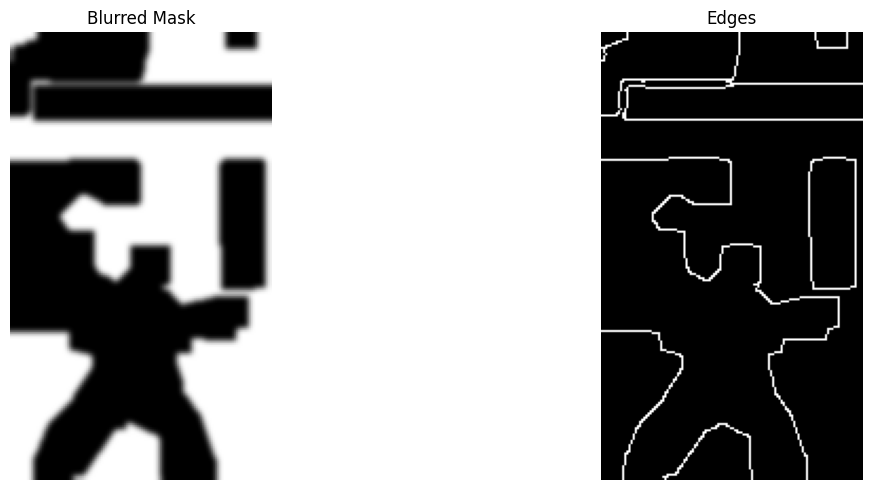

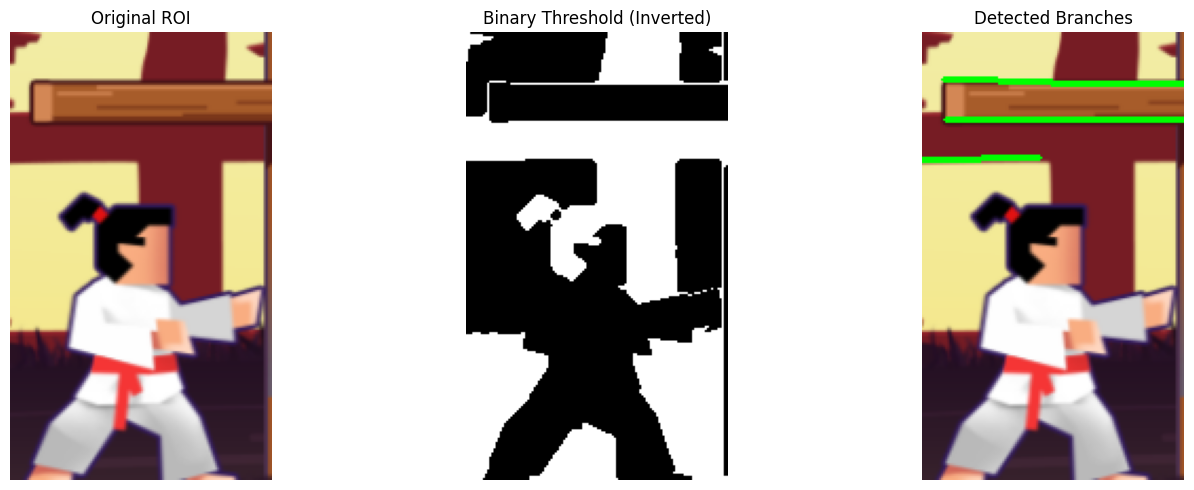

Branches Detected: [(11, 41, 123, 41), (10, 22, 61, 23), (61, 24, 123, 24), (0, 60, 55, 59)]
True


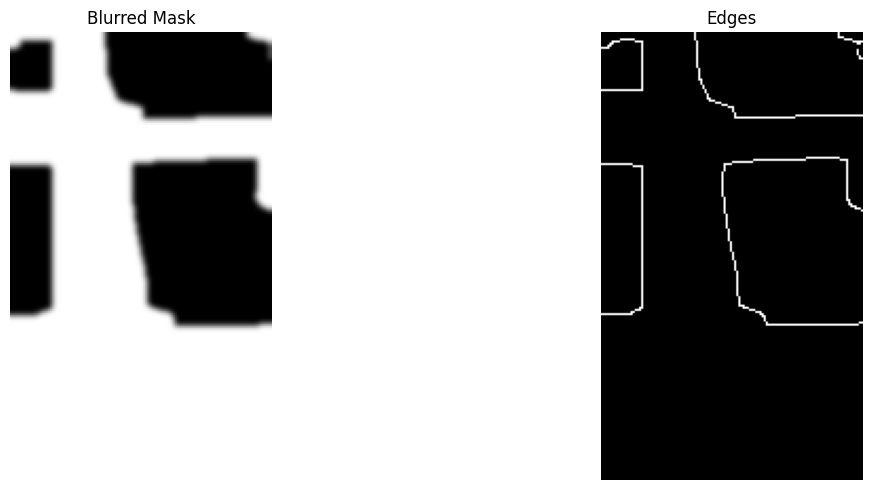

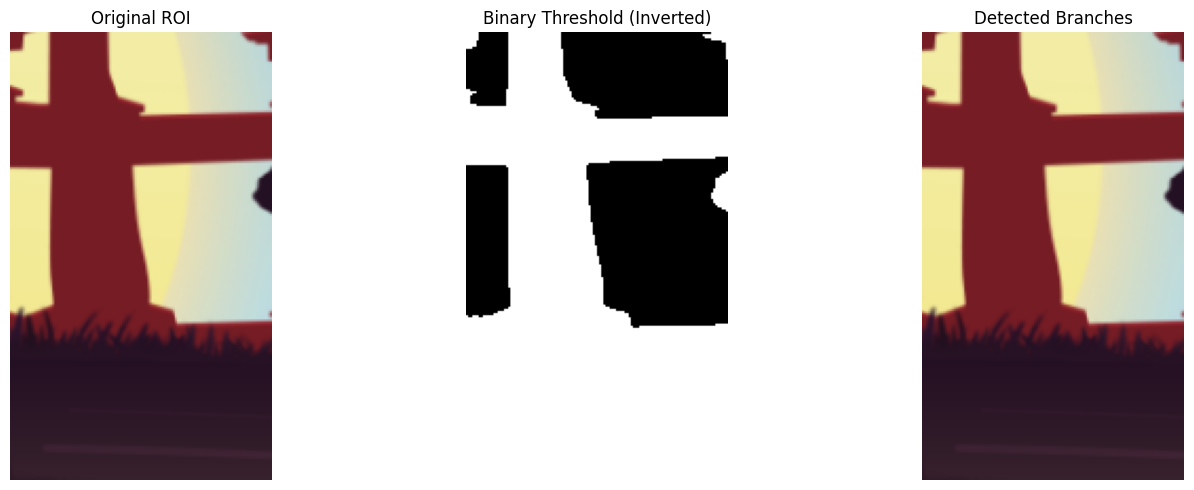

No branches detected.
False


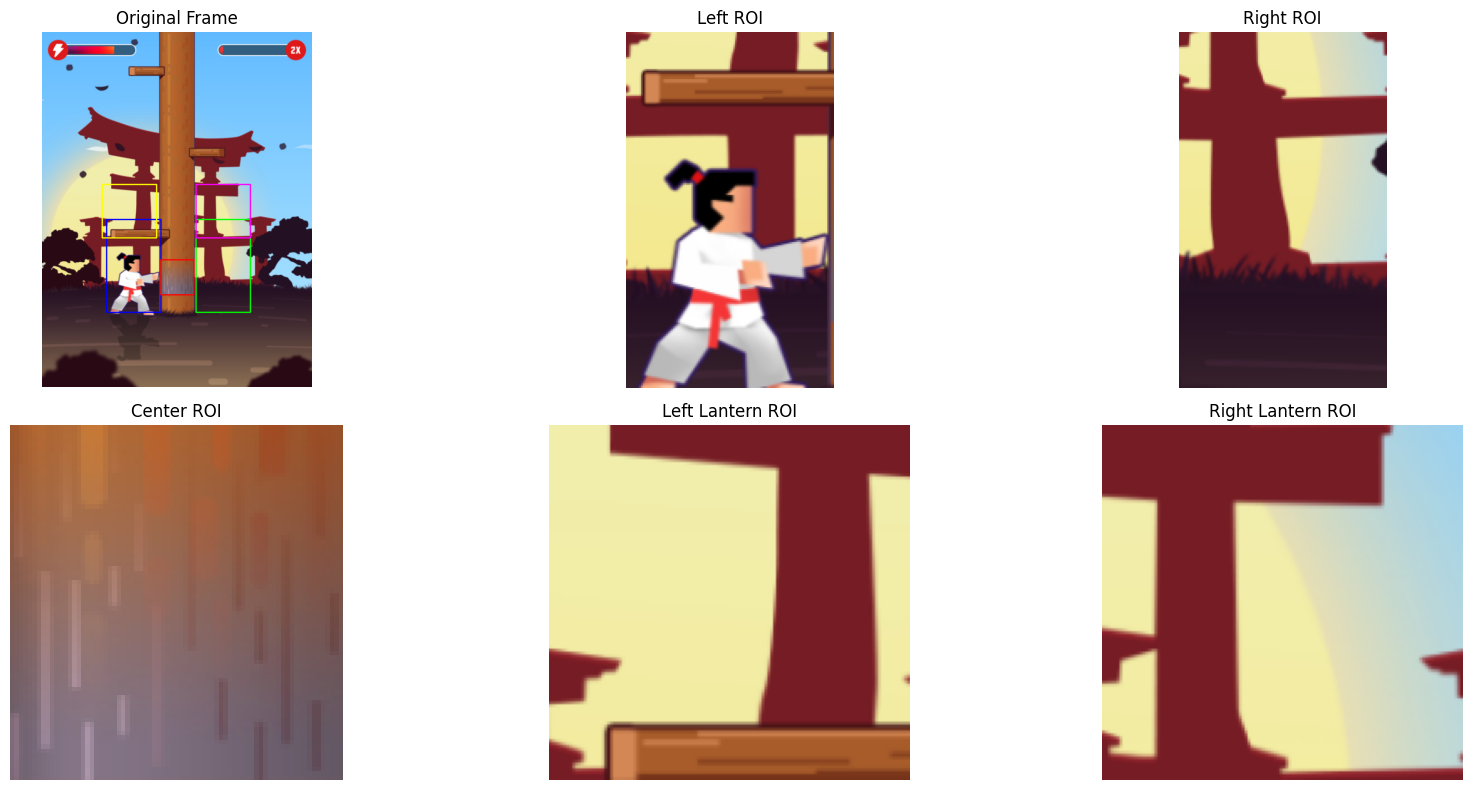

In [283]:
# Load the frame
frame = cv2.imread("saved_regions\game_region_20250107-195311.png")
if frame is None:
    print("Error: Could not load frame_left. Please check the file path.")
    exit()

identified_character = match_character_template(frame, characters)

if identified_character:
    print(f"Identified character: {identified_character}")
    characters[identified_character]["roi_function"](frame, characters[identified_character]["template"])
else:
    print("No character identified.")

img = cv2.imread("saved_regions\game_region_20250107-195311.png")
frame_ = img.copy()
x1 , y1 , w1 , h1 = LEFT_ROI
x2 , y2 , w2 , h2 = RIGHT_ROI
x3 , y3 , w3 , h3 = CENTER_ROI
x4 , y4 , w4 , h4 = LEFT_LANTERN_ROI
x5 , y5 , w5 , h5 = RIGHT_LANTERN_ROI



roi_region_left = img[y1:y1 + h1, x1:x1 + w1]
roi_region_right = img[y2:y2 + h2, x2:x2 + w2]
roi_region_center = img[y3:y3 + h3, x3:x3 + w3]
roi_region_lantern_left = img[y4: y4 + h4, x4: x4 + w4]
roi_region_lantern_right = img[y5: y5 + h5, x5: x5 + w5]

print(detect_branches_in_roi_hough_new(frame,LEFT_ROI))
print(detect_branches_in_roi_hough_new(frame,RIGHT_ROI))

img_2 = img.copy()
    # Draw left ROI
x, y, w, h = LEFT_ROI
cv2.rectangle(img_2, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Draw right ROI
x, y, w, h = RIGHT_ROI
cv2.rectangle(img_2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw center ROI on the left frame
x, y, w, h = CENTER_ROI
cv2.rectangle(img_2, (x, y), (x + w, y + h), (0, 0, 255), 2)

x, y, w, h = LEFT_LANTERN_ROI
cv2.rectangle(img_2,(x, y), (x + w, y + h), (0, 255, 255), 2 )

x, y, w, h = RIGHT_LANTERN_ROI
cv2.rectangle(img_2,(x, y), (x + w, y + h), (255, 0, 255), 2 )


# Check if the Center ROI is mostly white
"""is_branch = isBranchOnly(roi_region_center)
print(f"Is Center ROI Branch Only? {is_branch}")"""

# Assuming roi_region_left and roi_region_right are the left and right ROIs
"""is_glass_detected = isGlass(roi_region_left, roi_region_right)
print(f"Is Vertical Glass Detected? {is_glass_detected}")"""
# Detect lanterns
"""detected, side = detect_lantern_debug(roi_region_lantern_left, roi_region_lantern_right, lanterns_ref_images)

if detected:
    print(f"Lantern detected on the {side} side.")
else:
    print("No lantern detected.")"""
#cv2.imwrite("roi_center_3.png", roi_region_center)
    # Visualization
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
ax[0,0].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax[0,0].set_title("Original Frame")
ax[0,0].axis("off")

ax[0,1].imshow(cv2.cvtColor(roi_region_left, cv2.COLOR_BGR2RGB))
ax[0,1].set_title("Left ROI")
ax[0,1].axis("off")

ax[0,2].imshow(cv2.cvtColor(roi_region_right, cv2.COLOR_BGR2RGB))
ax[0,2].set_title("Right ROI")
ax[0,2].axis("off")

ax[1,0].imshow(cv2.cvtColor(roi_region_center, cv2.COLOR_BGR2RGB))
ax[1,0].set_title("Center ROI")
ax[1,0].axis("off")

ax[1,1].imshow(cv2.cvtColor(roi_region_lantern_left, cv2.COLOR_BGR2RGB))
ax[1,1].set_title("Left Lantern ROI")
ax[1,1].axis("off")

ax[1,2].imshow(cv2.cvtColor(roi_region_lantern_right, cv2.COLOR_BGR2RGB))
ax[1,2].set_title("Right Lantern ROI")
ax[1,2].axis("off")


plt.tight_layout()
plt.show()

In [224]:
img = cv2.imread("saved_regions\center_roi_20250106-224847.png")
img.shape

(83, 76, 3)

### DEBUG FOR A LIST OF FRAMES

Processing frame 1...
Identified character: player3


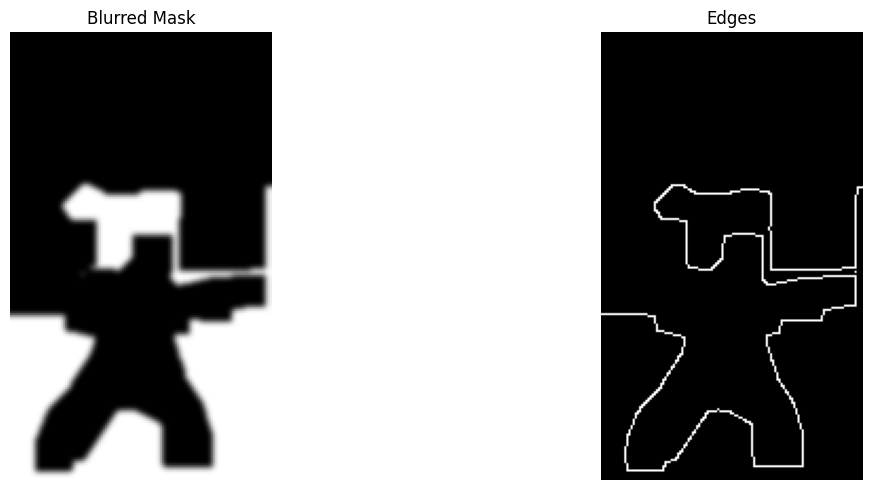

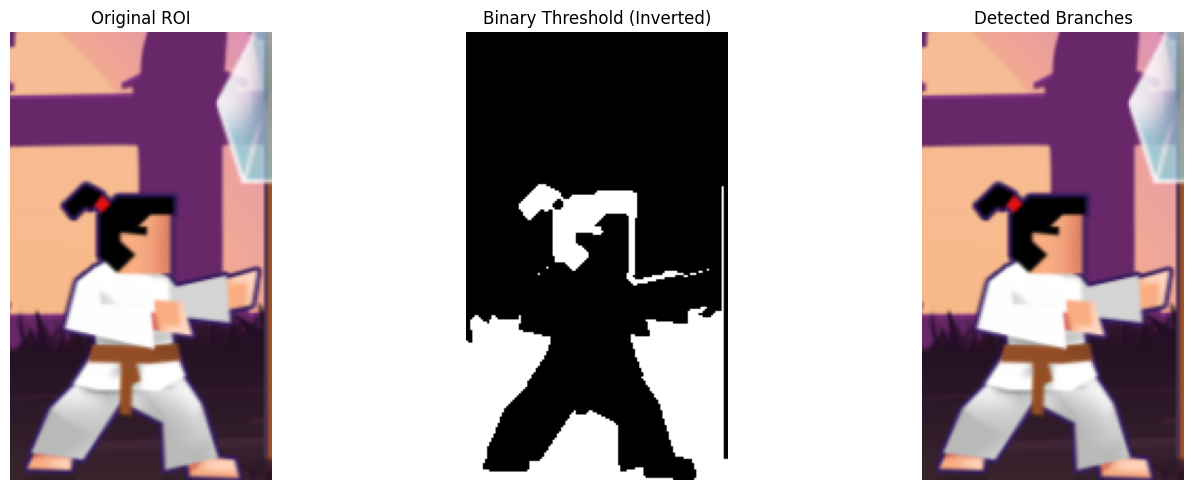

No branches detected.
False


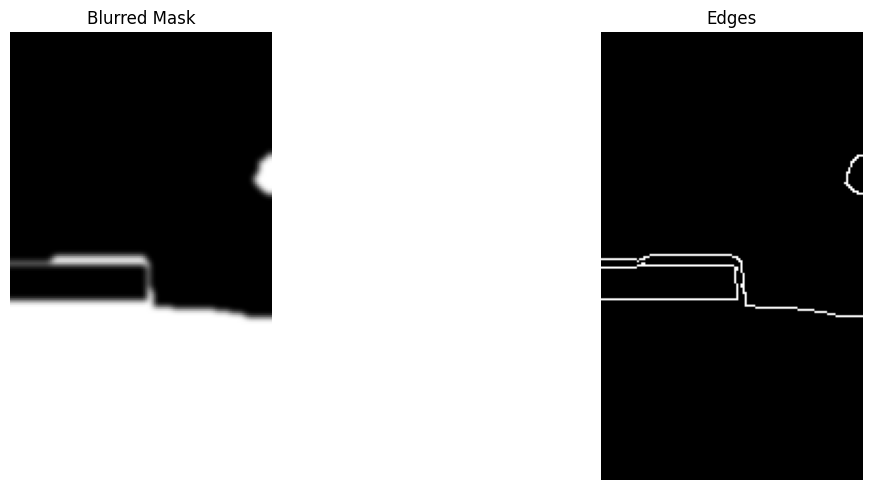

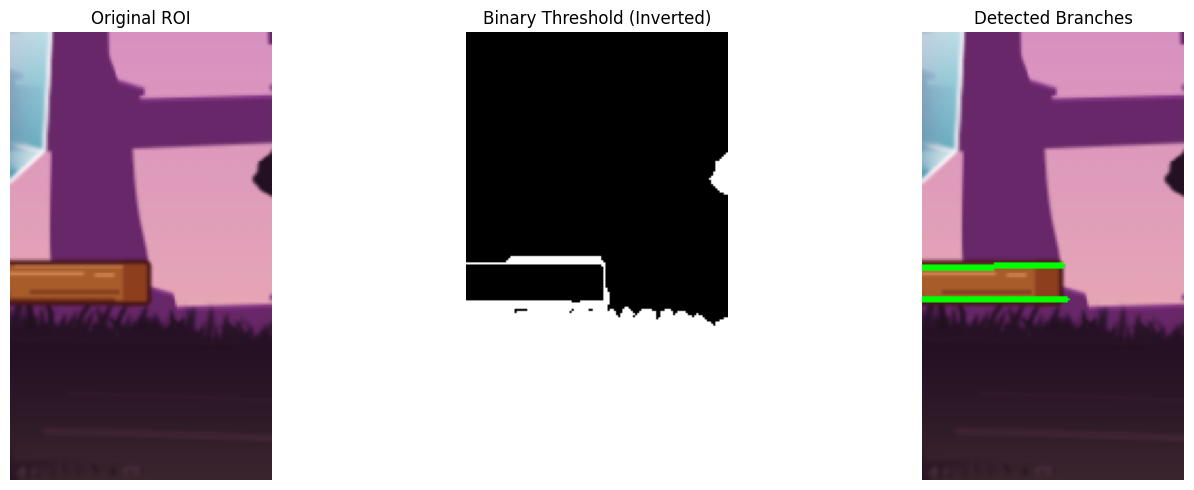

Branches Detected: [(0, 126, 68, 126), (0, 111, 66, 110)]
True


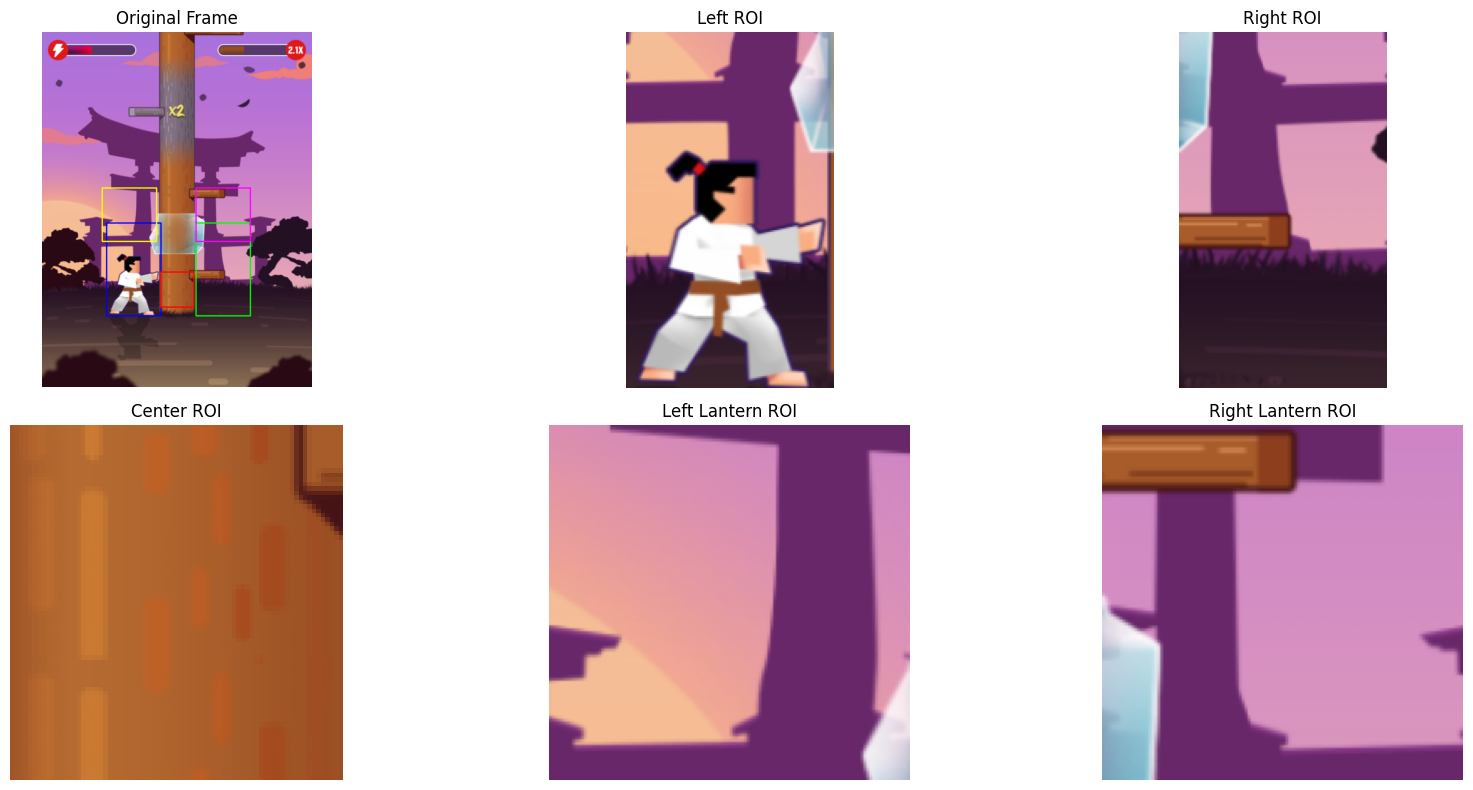

Processing frame 2...
Identified character: player2


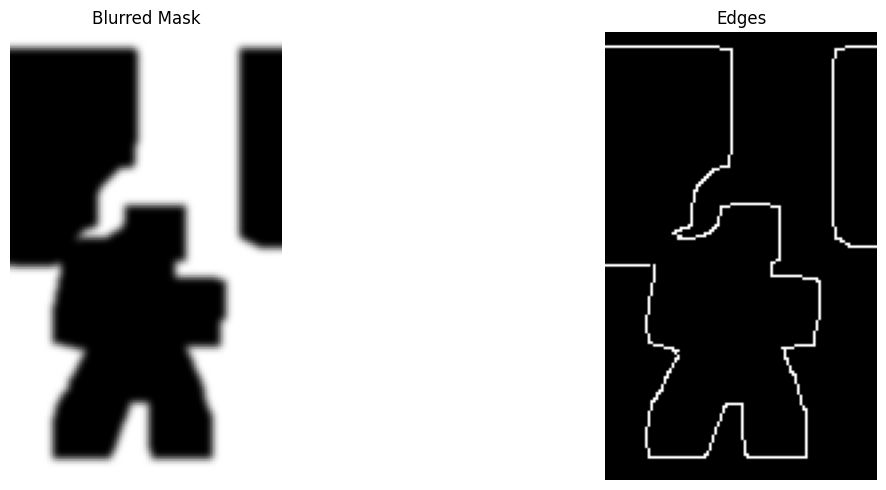

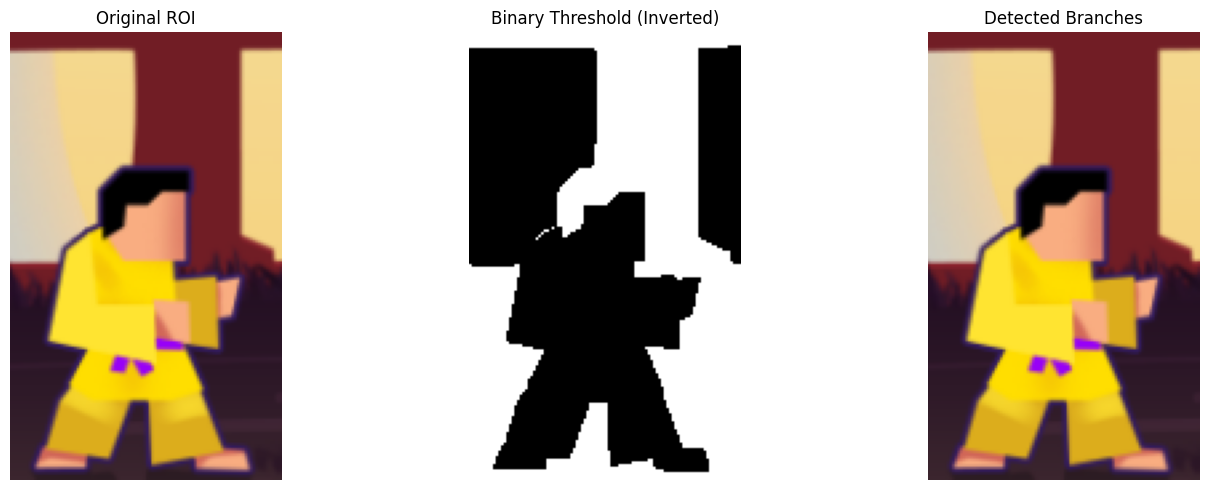

No branches detected.
False


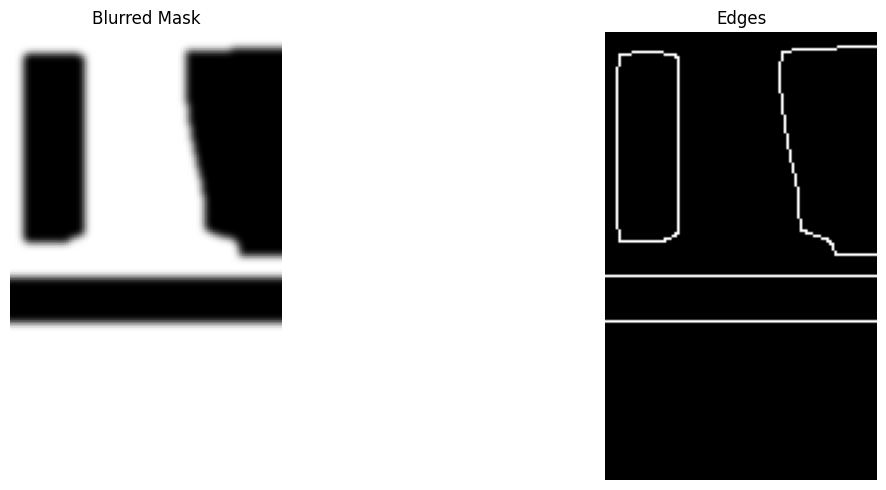

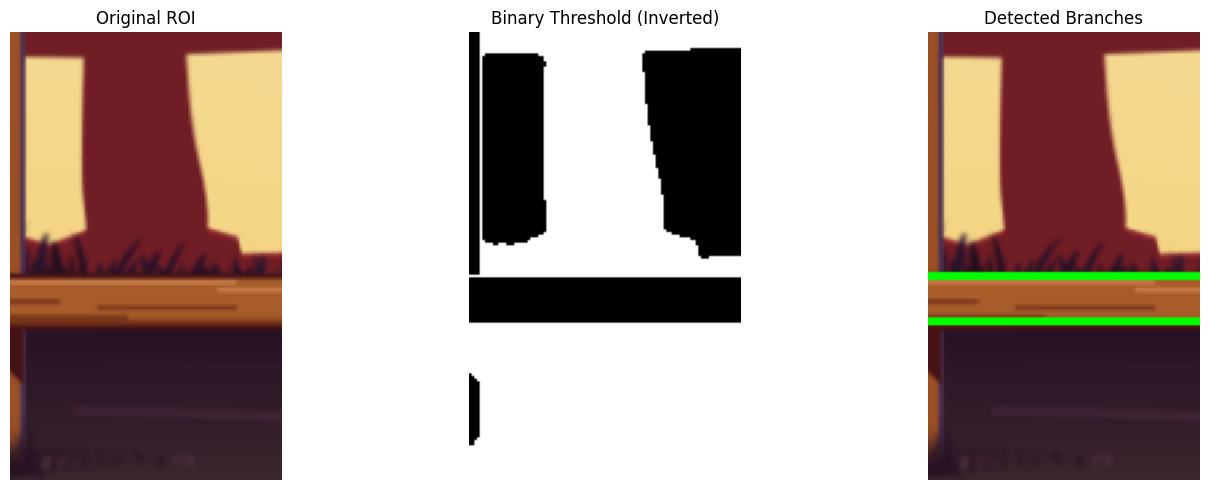

Branches Detected: [(0, 108, 101, 108), (0, 91, 101, 91)]
True


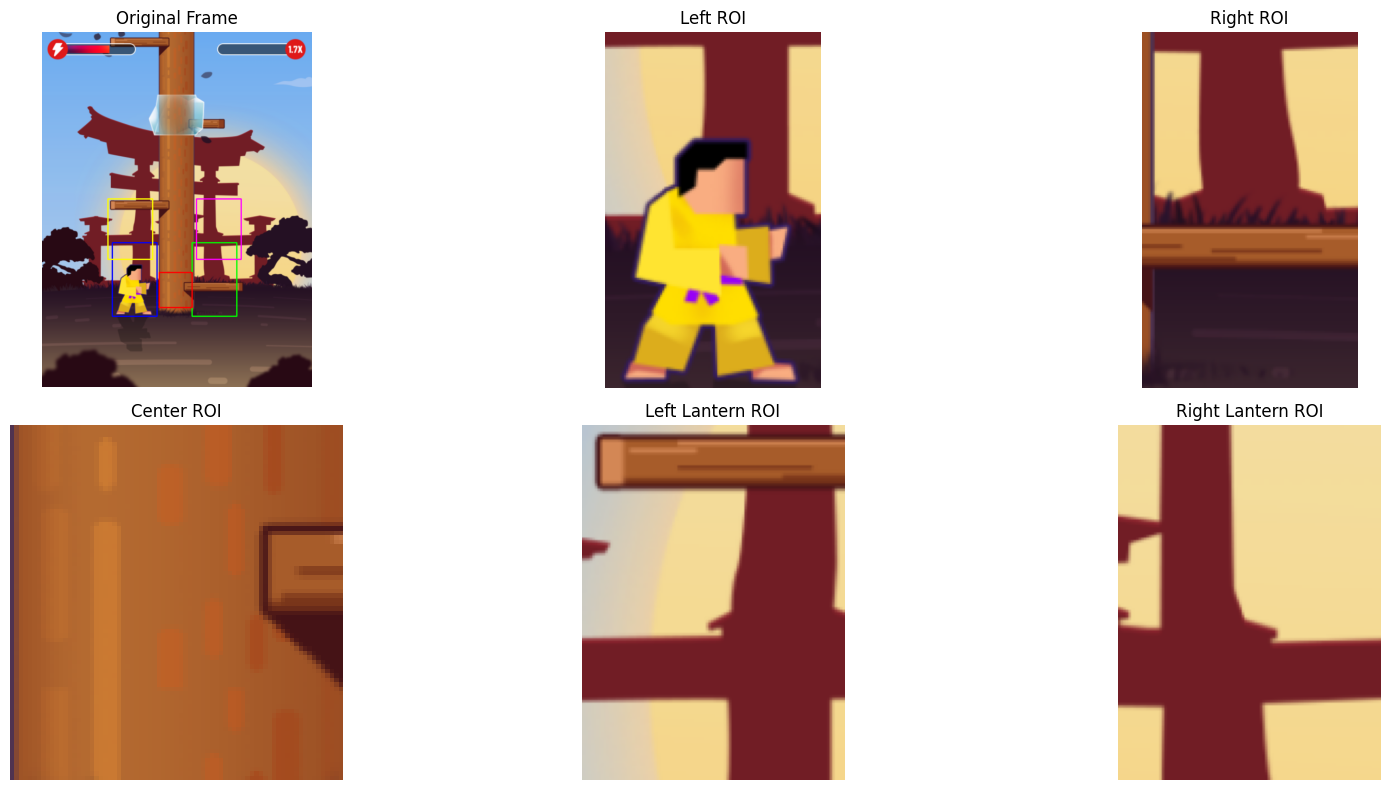

Processing frame 3...
Identified character: player2


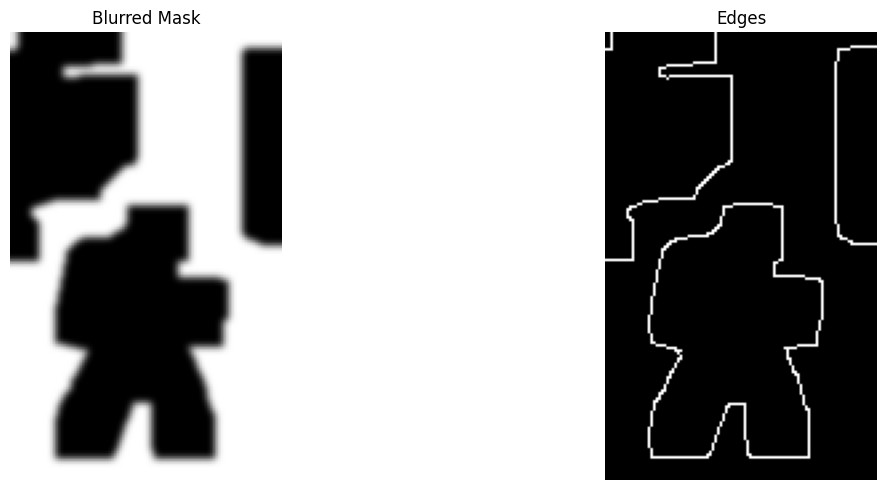

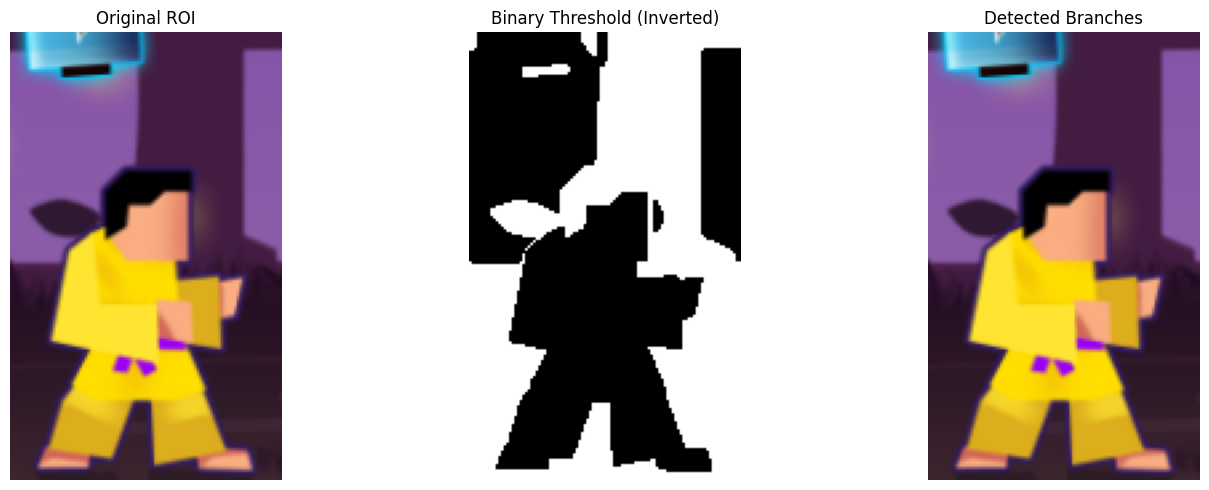

No branches detected.
False


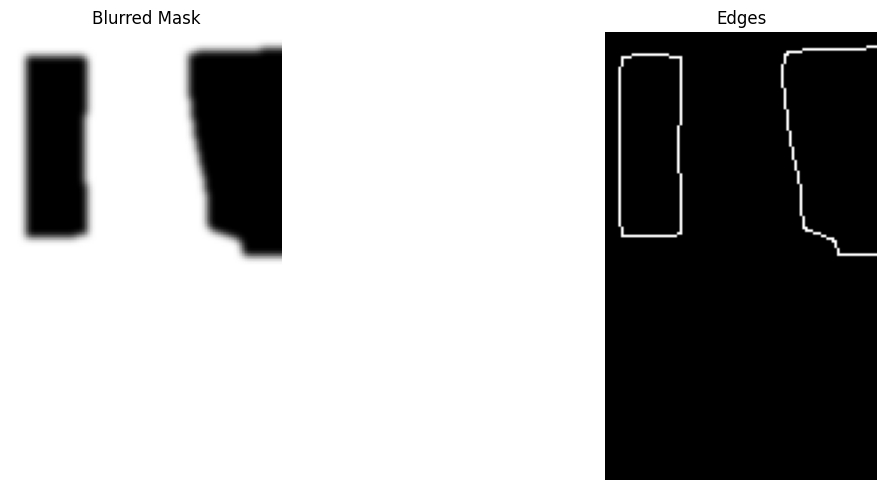

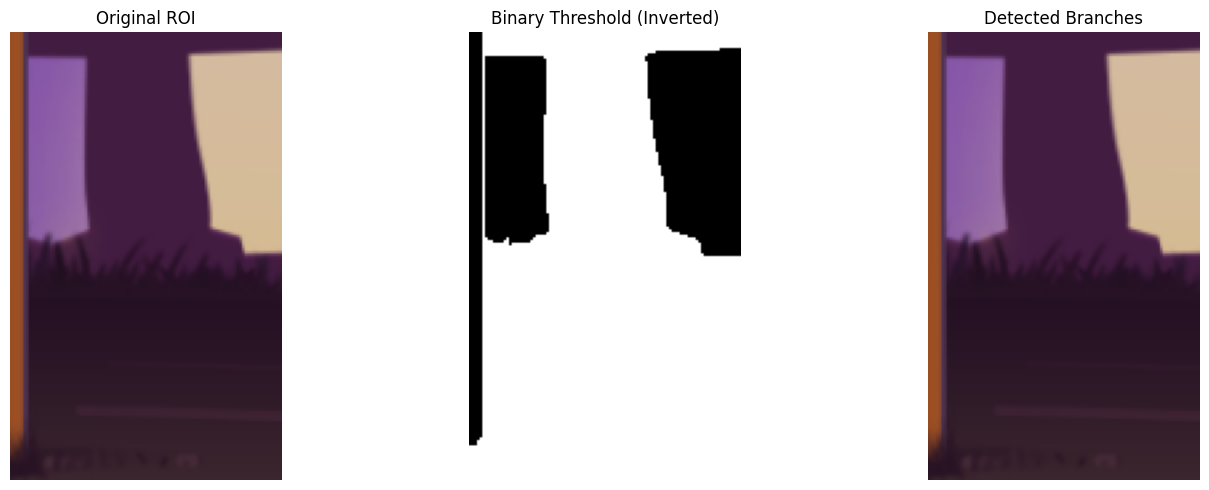

No branches detected.
False


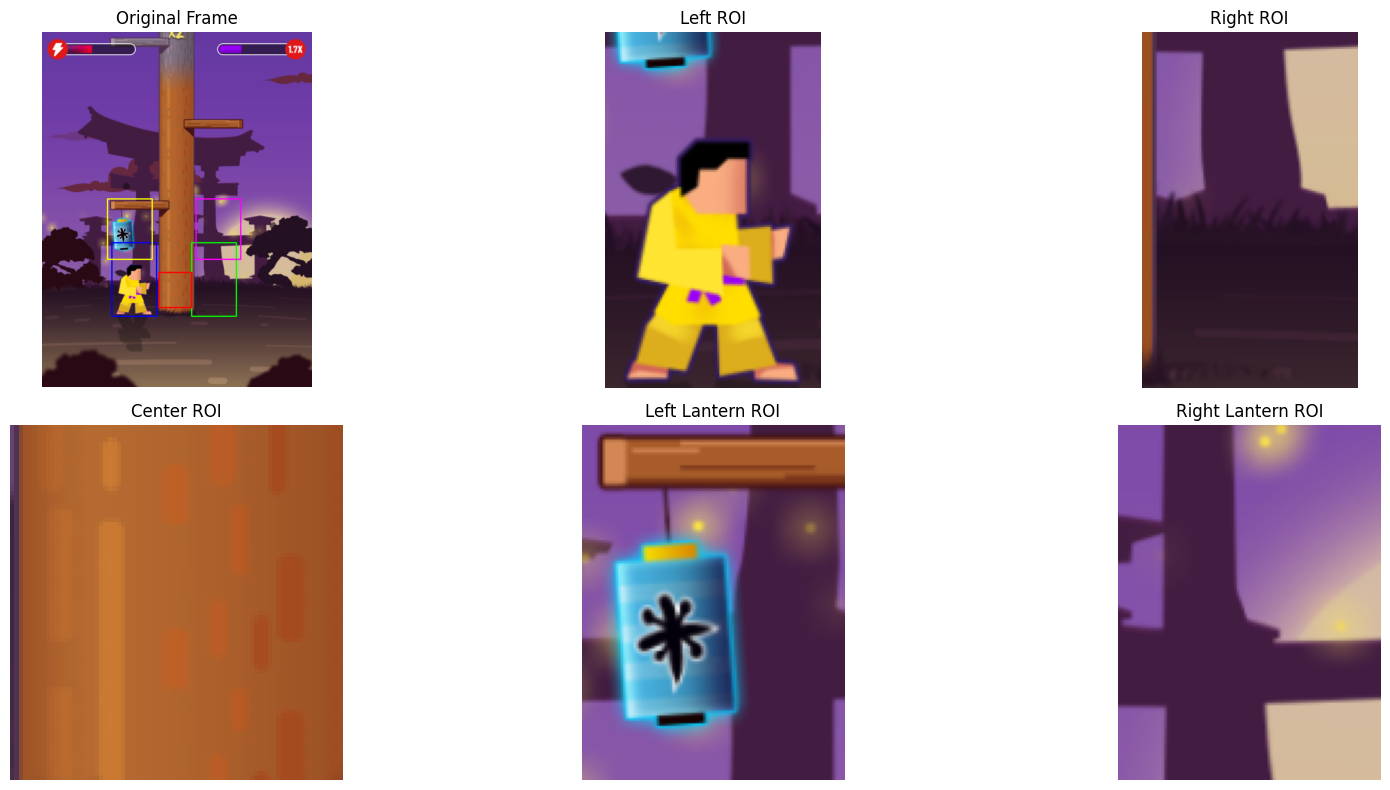

Processing frame 4...
Identified character: player2


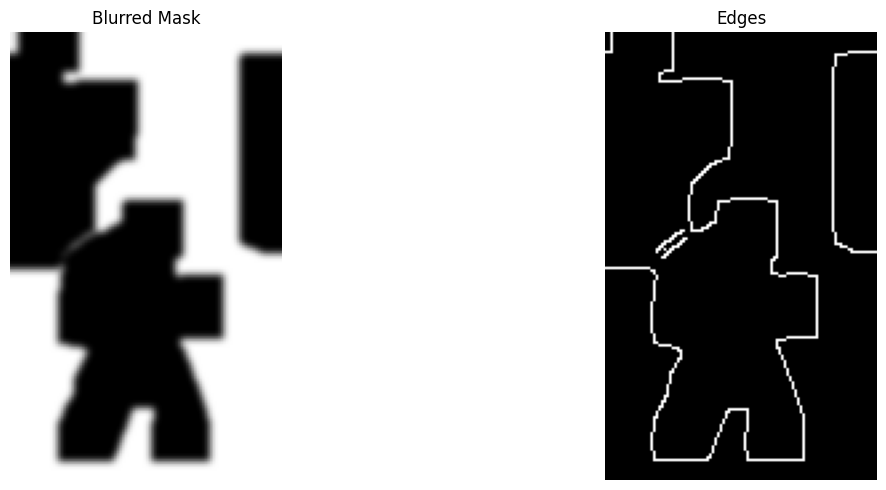

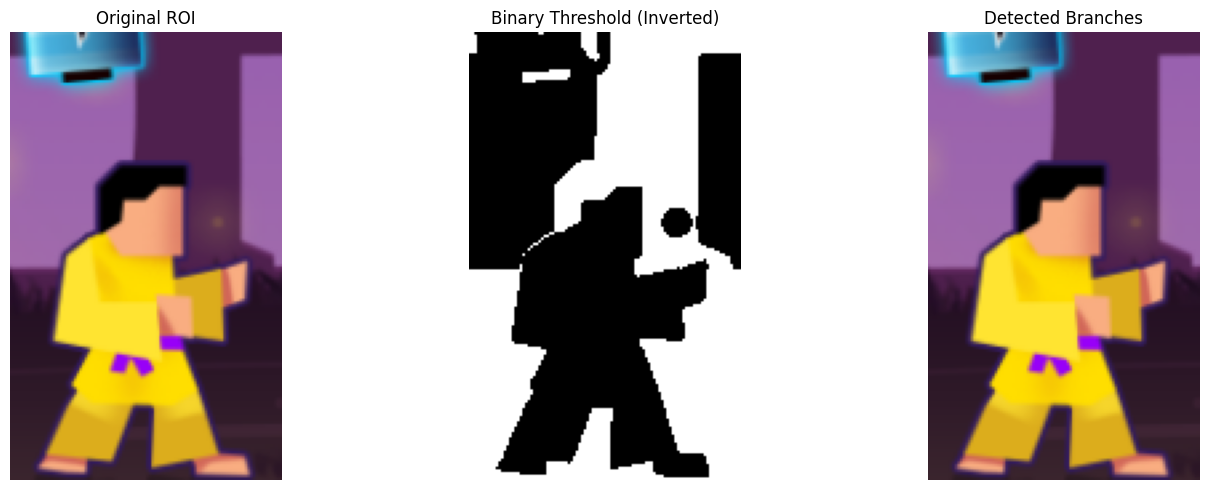

No branches detected.
False


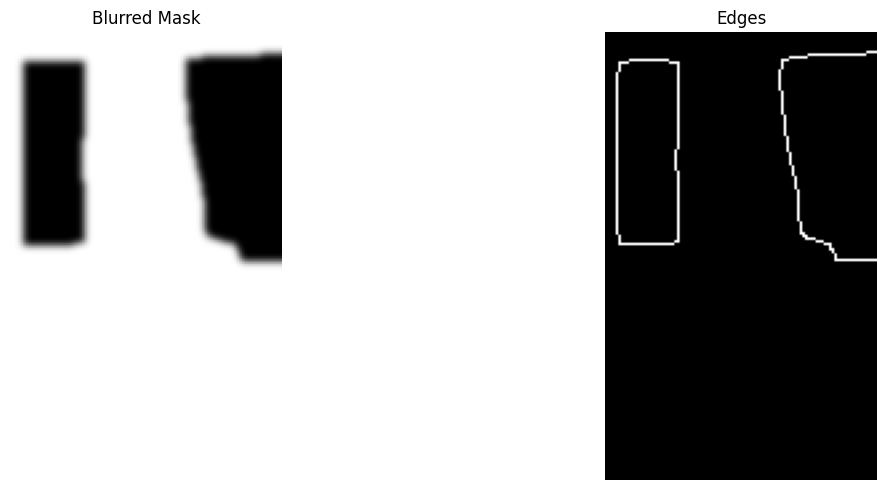

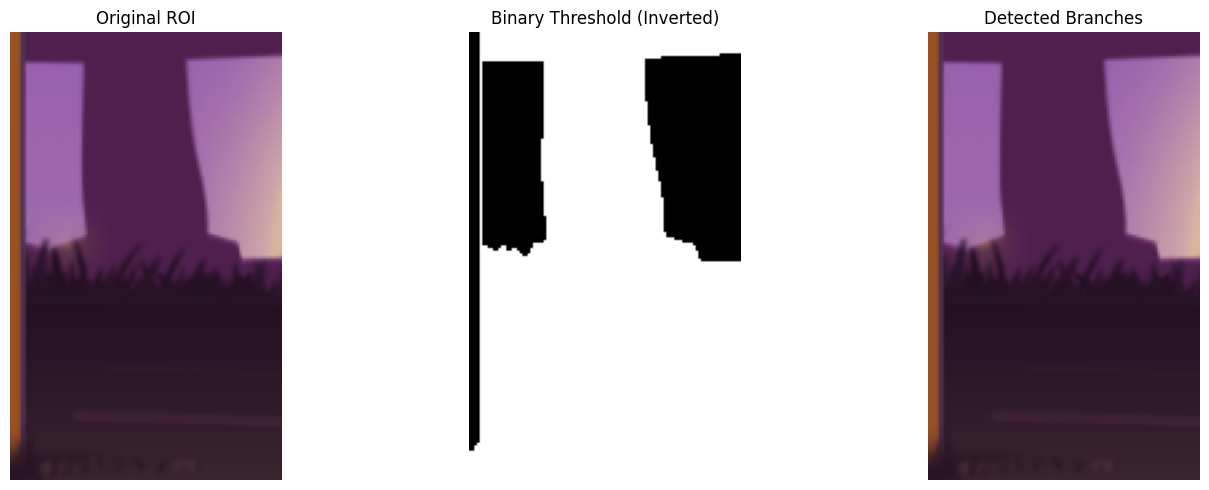

No branches detected.
False


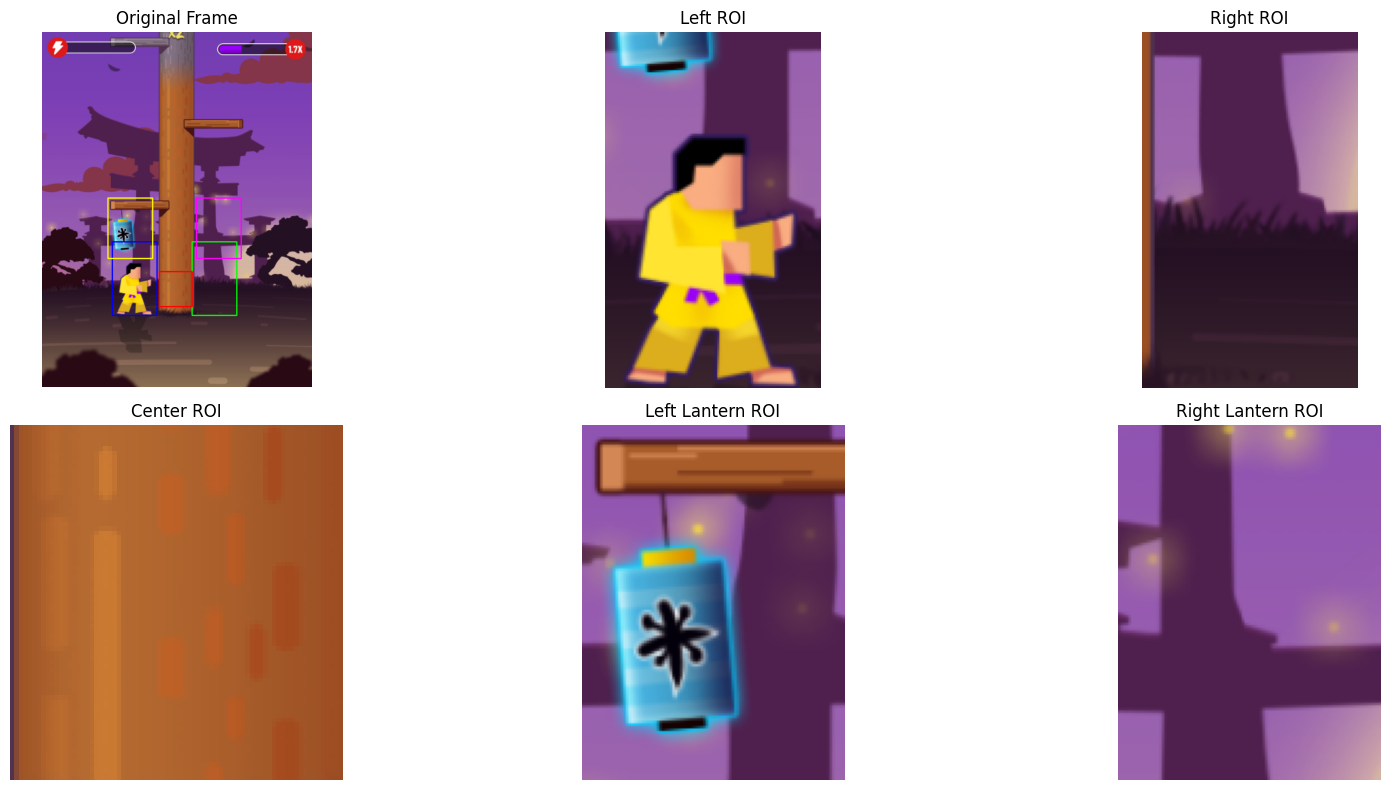

Processing frame 5...
Identified character: player3


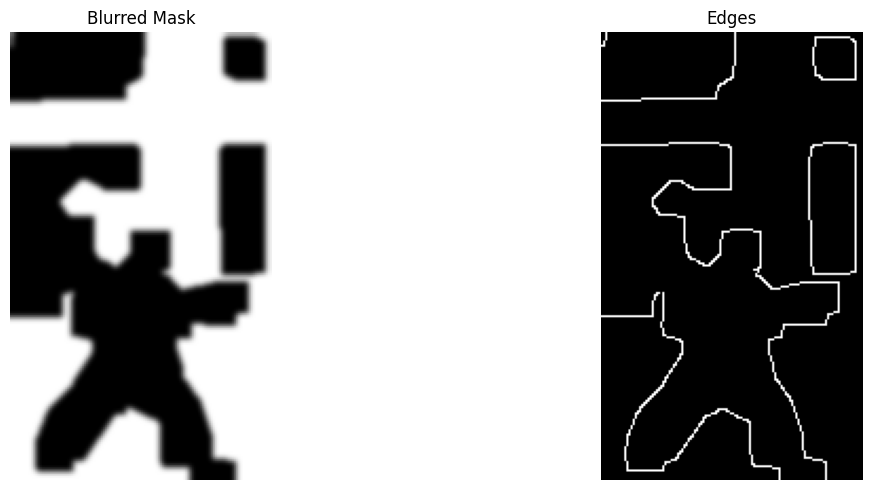

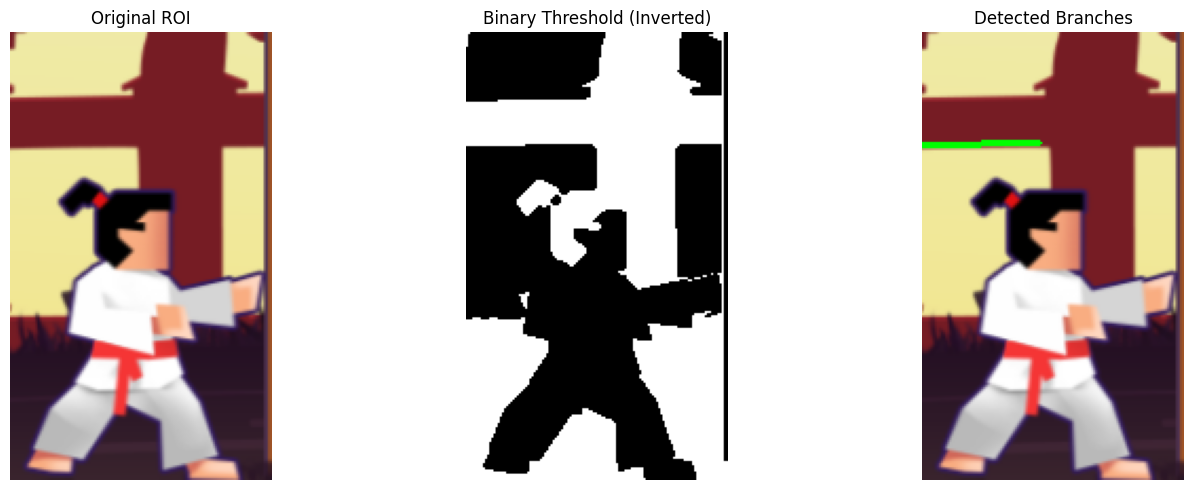

Branches Detected: [(0, 53, 55, 52)]
True


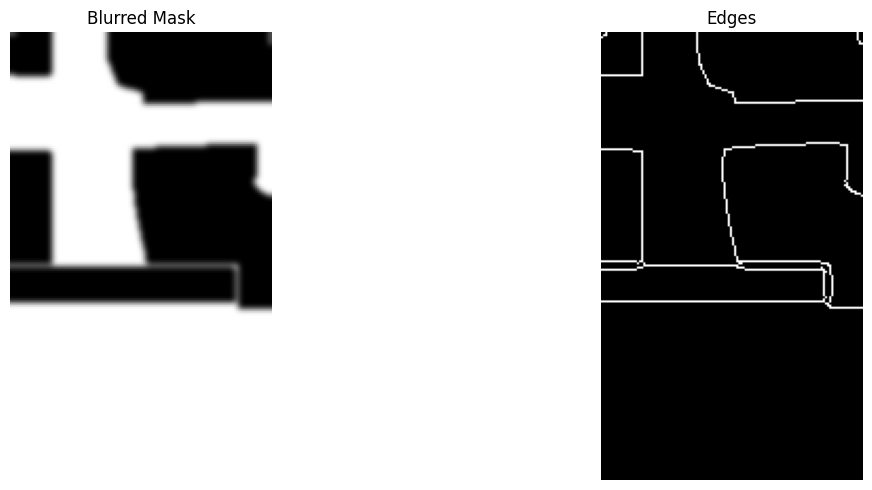

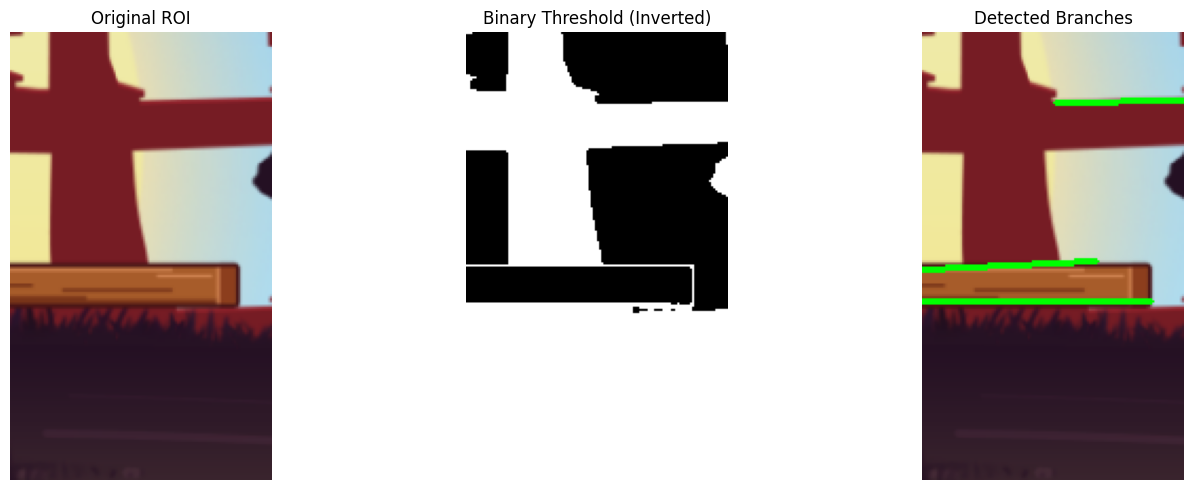

Branches Detected: [(0, 127, 108, 127), (0, 112, 82, 108), (63, 33, 123, 32)]
True


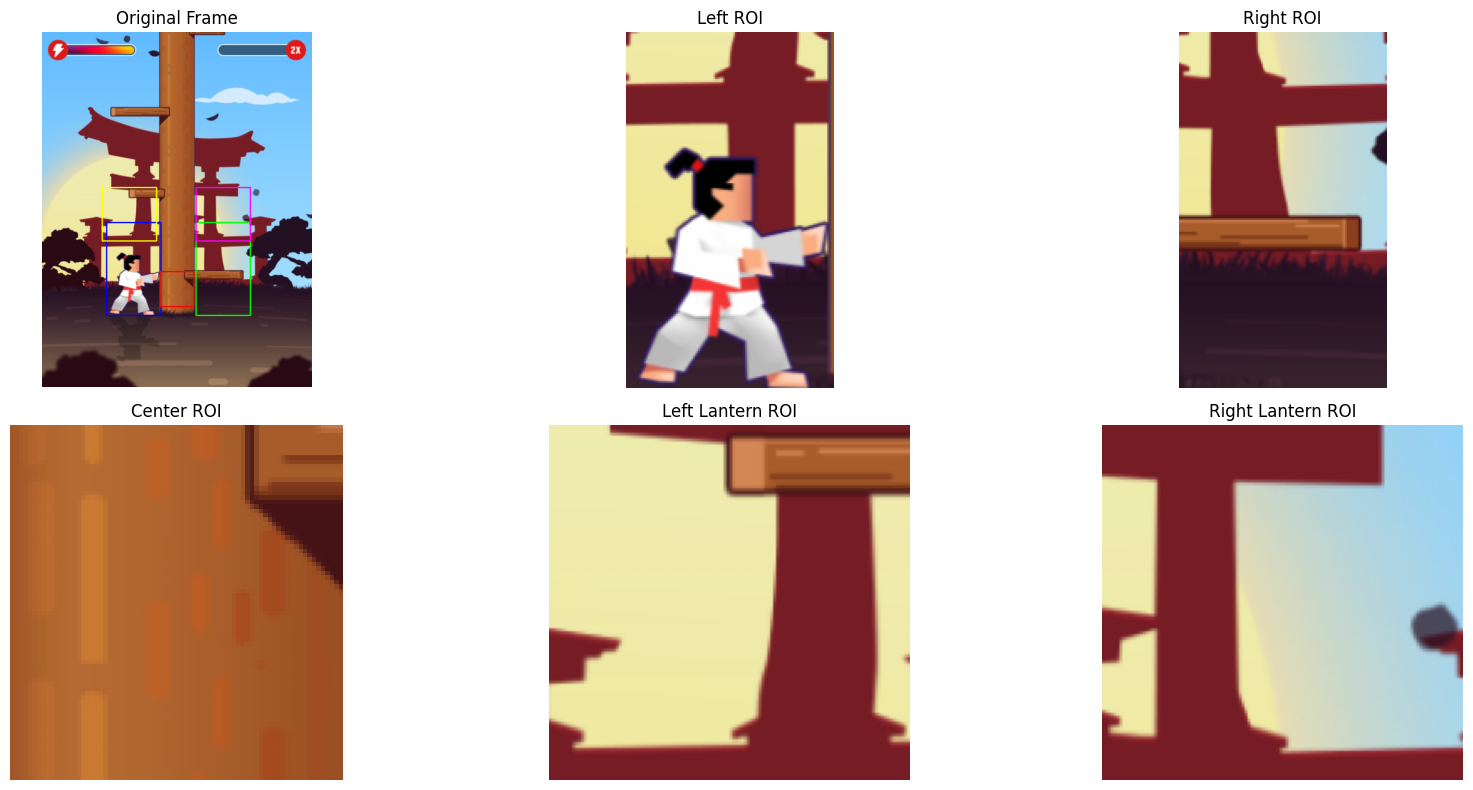

Processing frame 6...
Identified character: player3


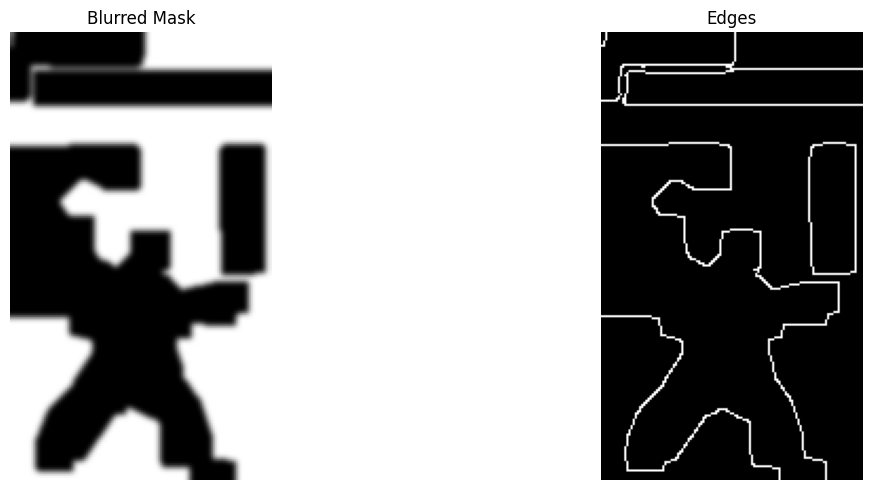

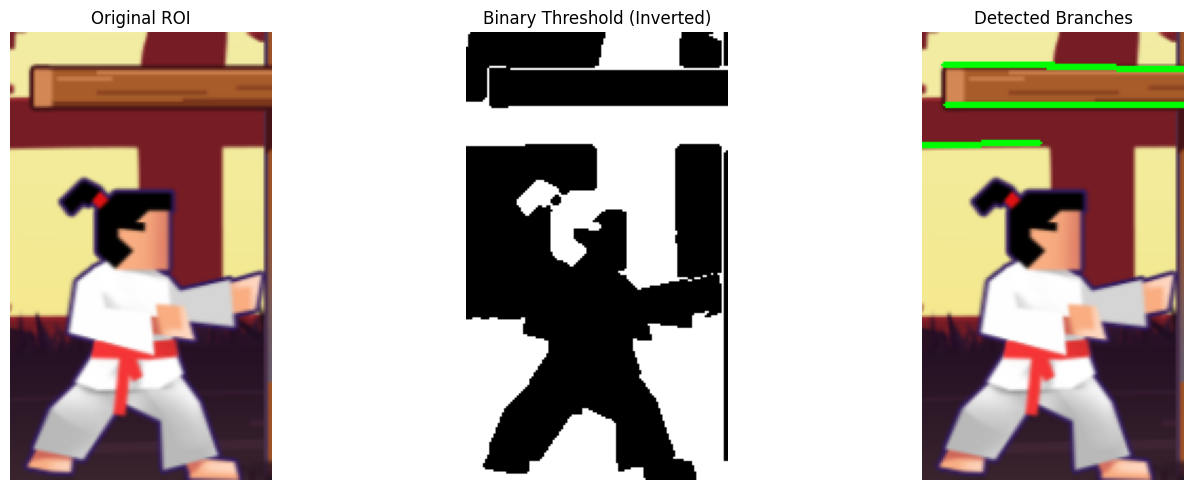

Branches Detected: [(11, 34, 123, 34), (59, 16, 123, 17), (0, 53, 55, 52), (10, 15, 62, 15)]
True


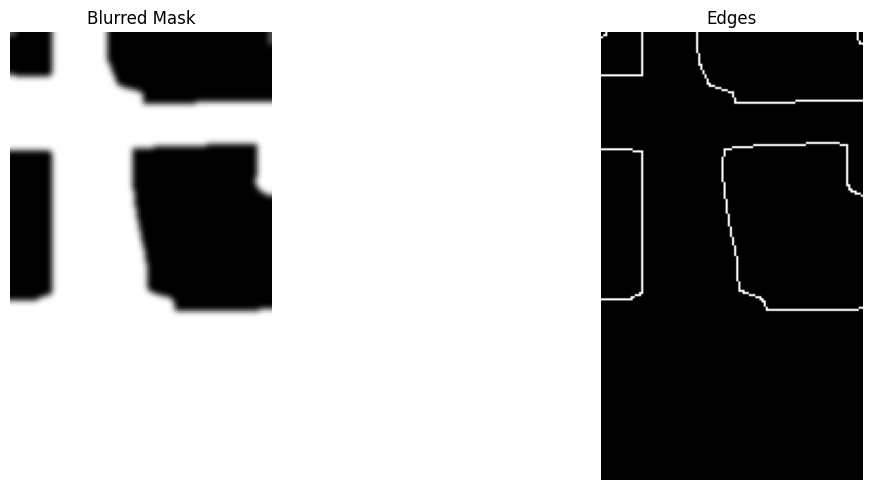

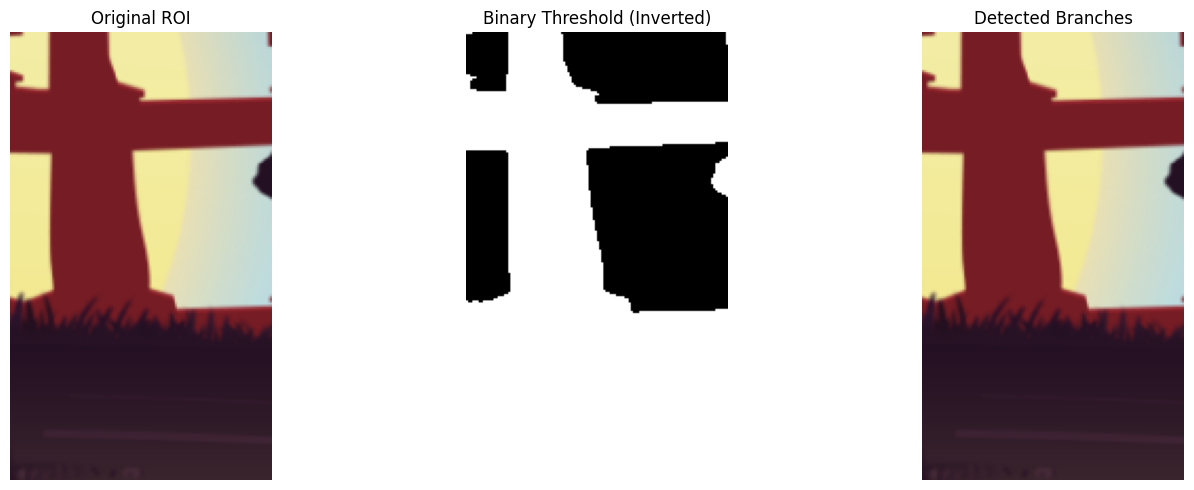

No branches detected.
False


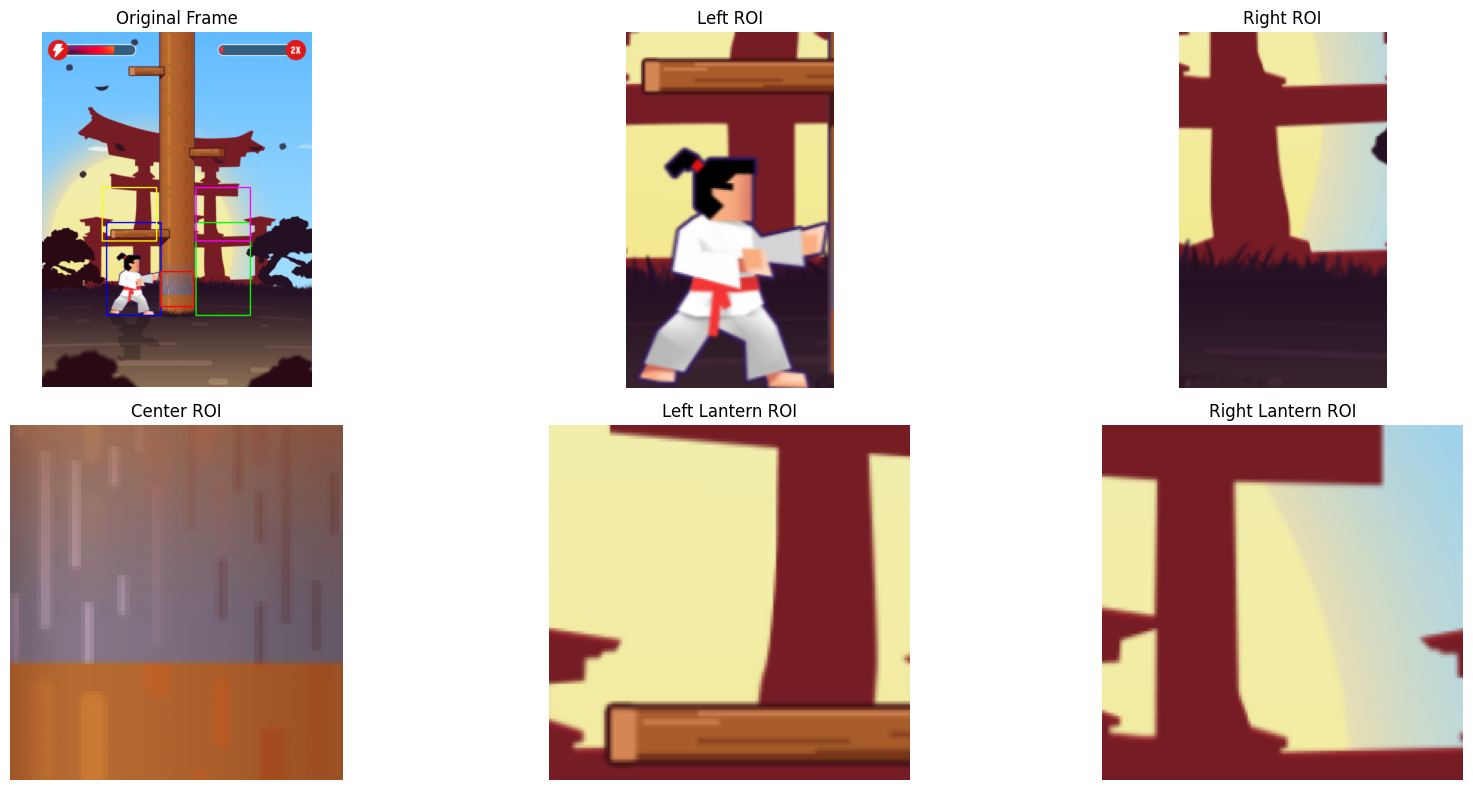

Processing frame 7...
Identified character: player3


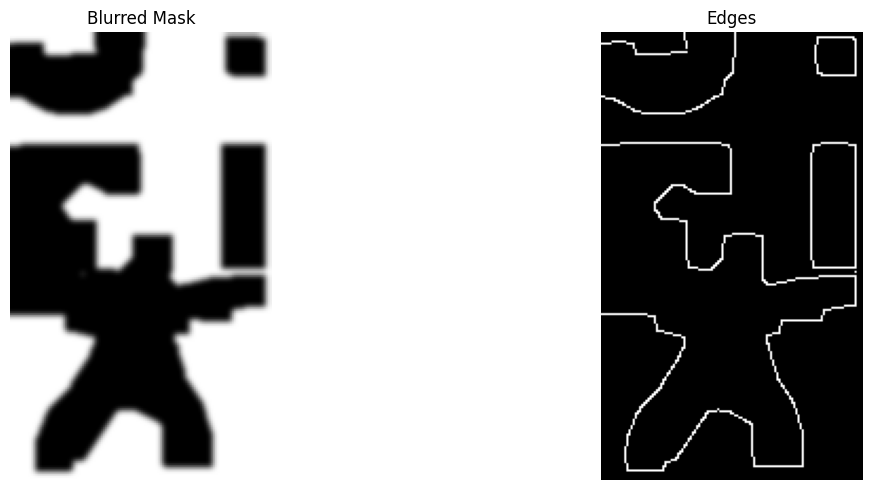

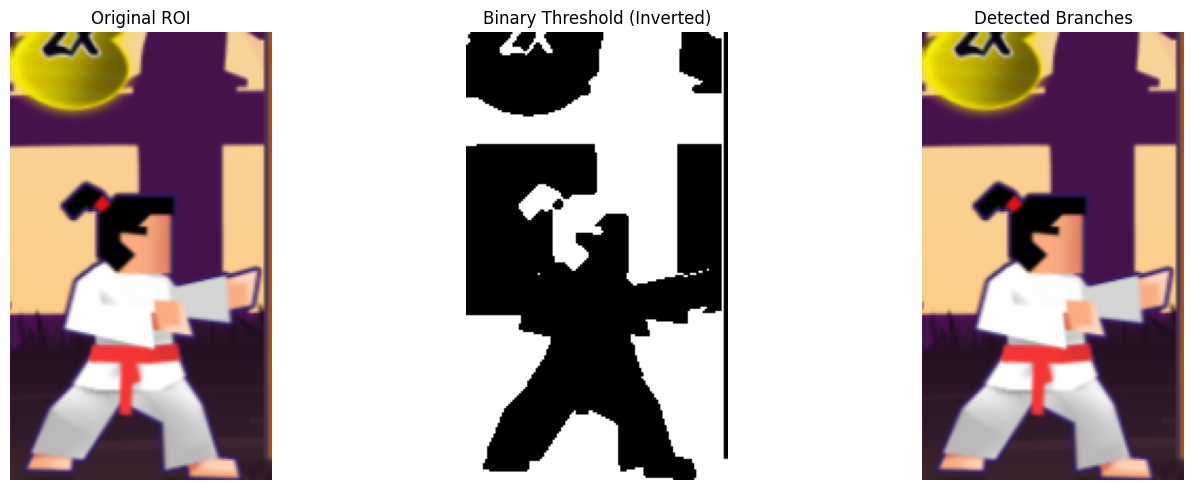

No branches detected.
False


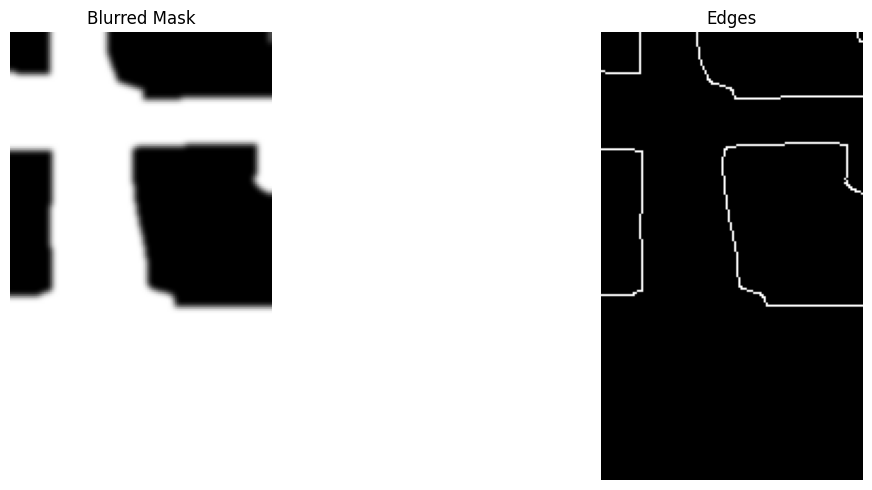

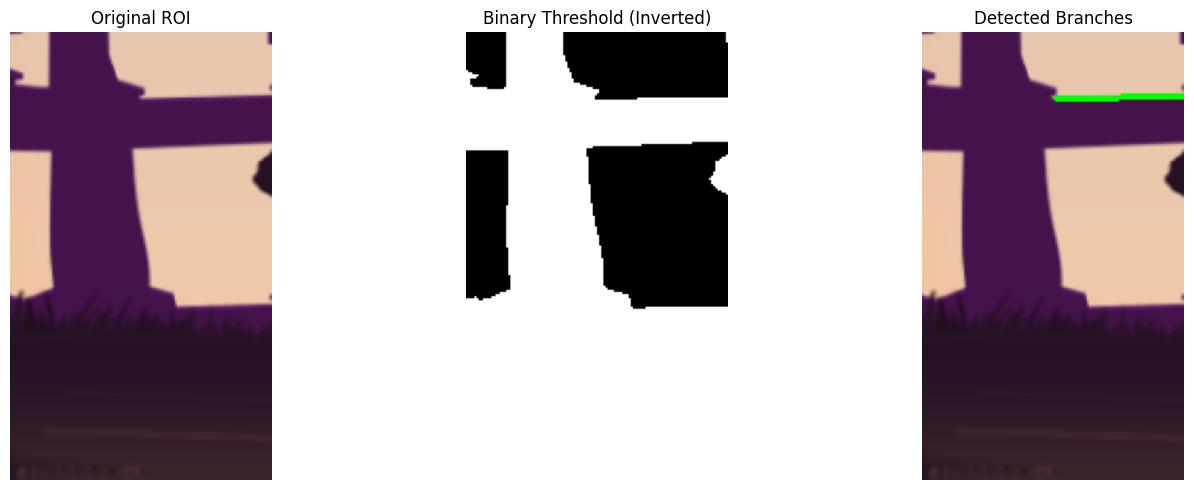

Branches Detected: [(63, 31, 123, 30)]
True


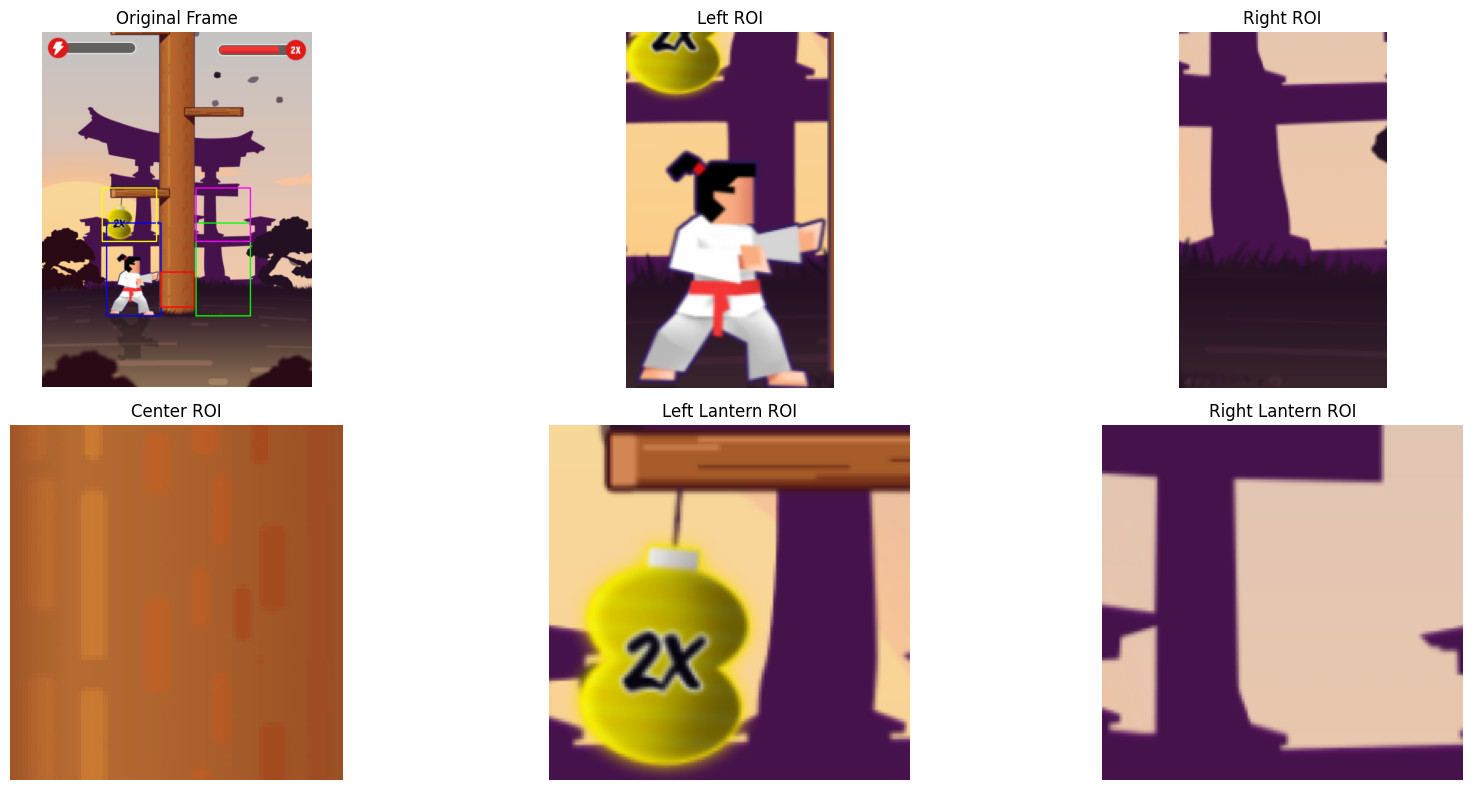

Processing frame 8...
Identified character: player3


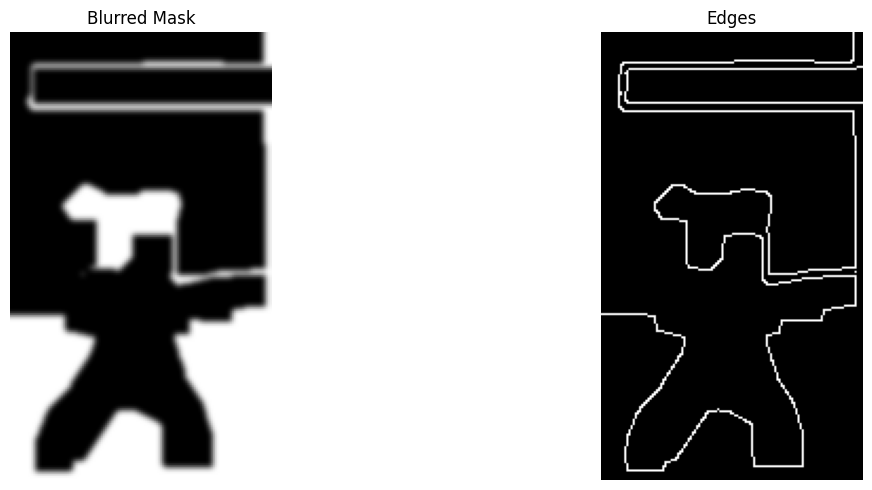

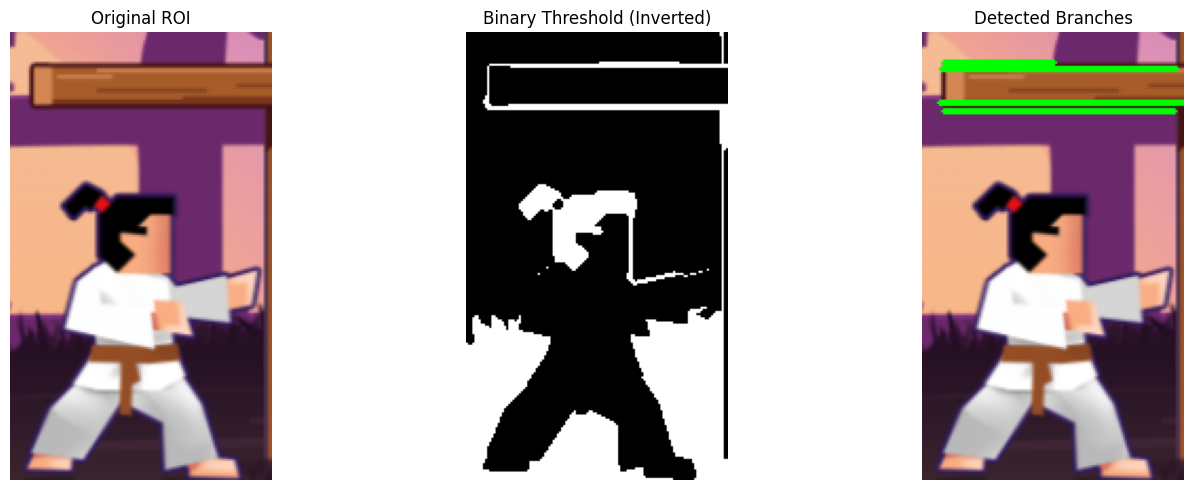

Branches Detected: [(9, 17, 120, 17), (10, 37, 119, 37), (8, 33, 123, 33), (10, 14, 62, 14)]
True


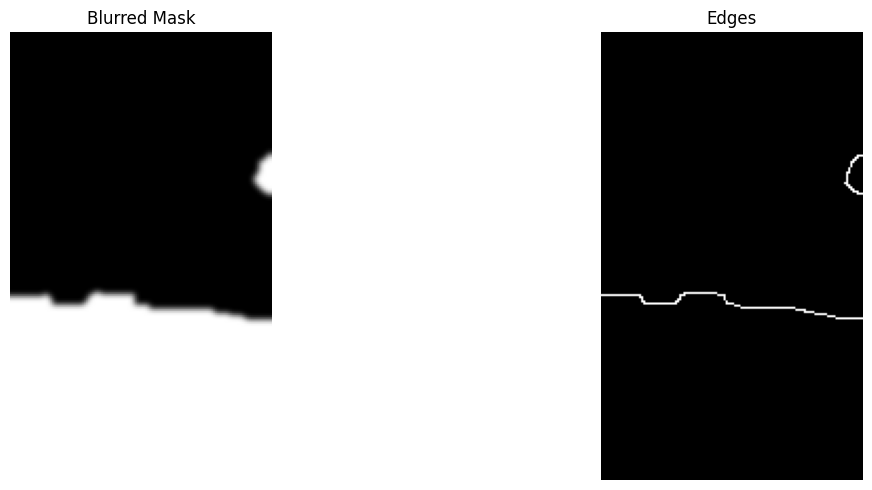

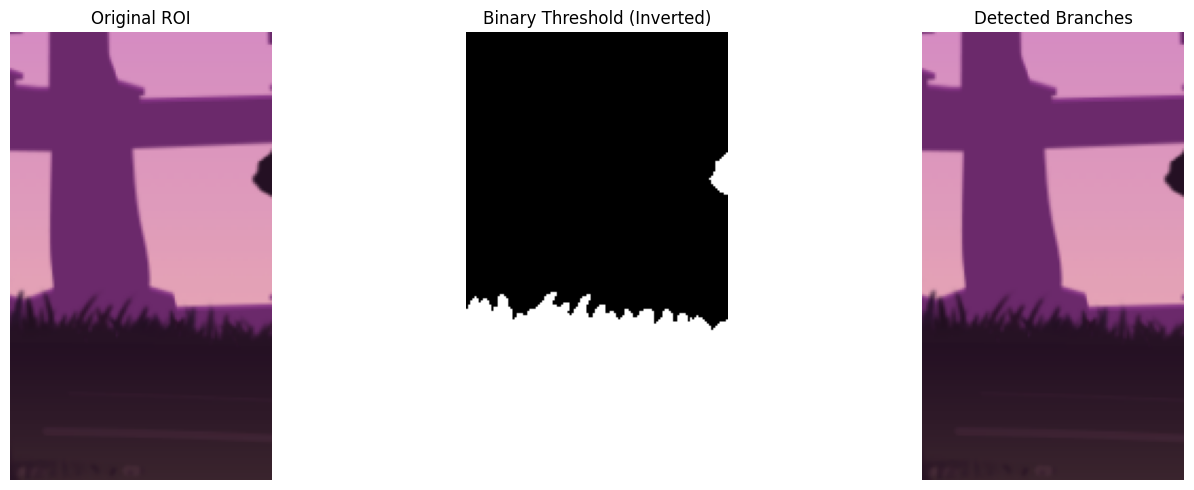

No branches detected.
False


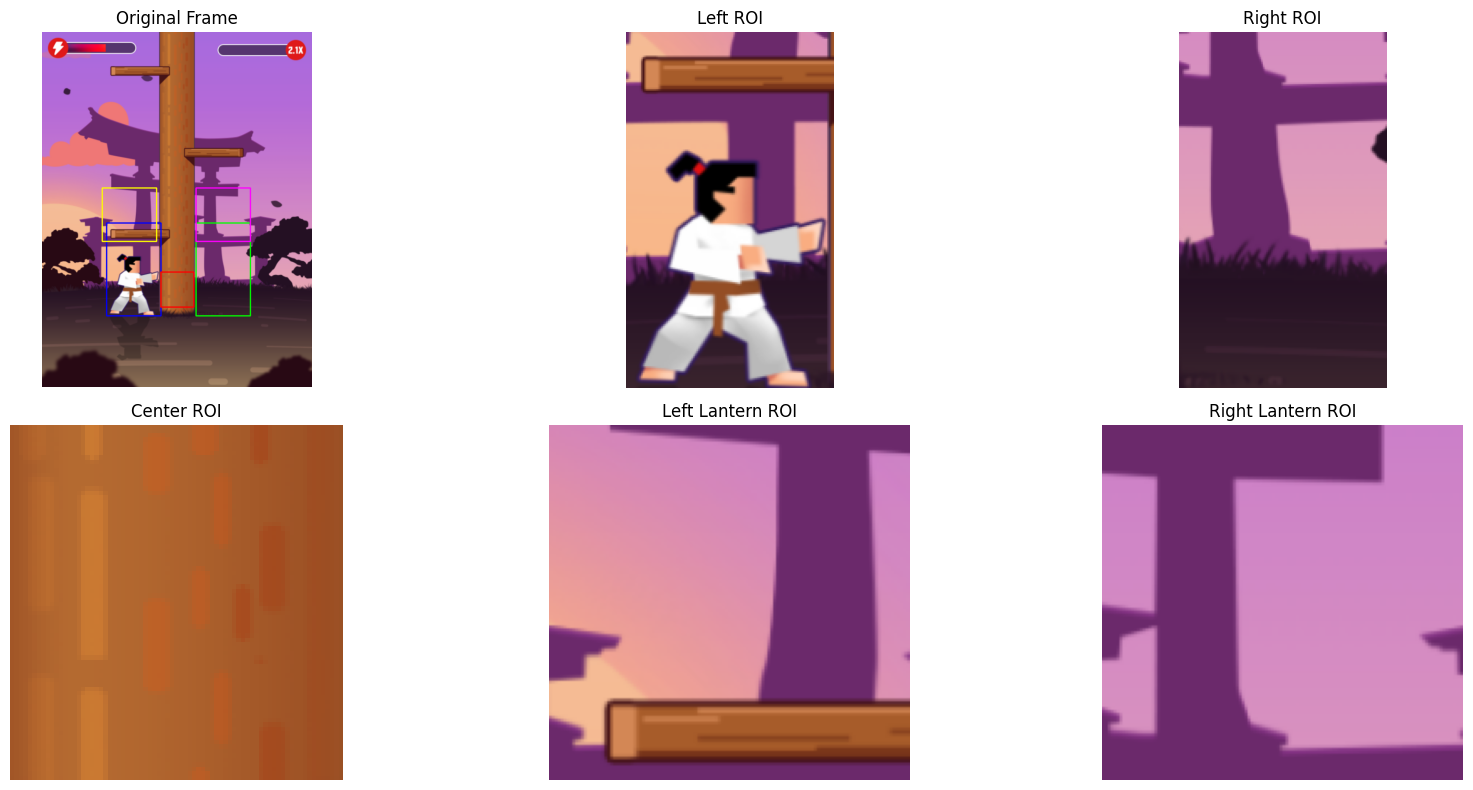

Processing frame 9...
Identified character: player3


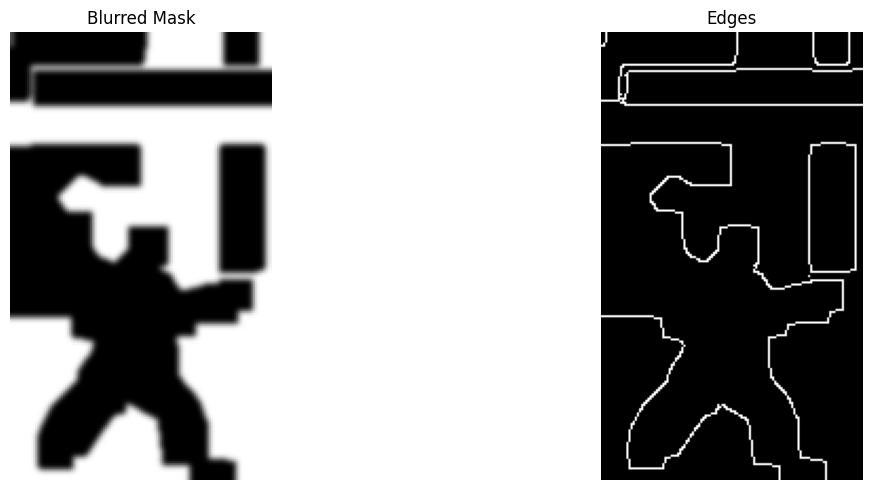

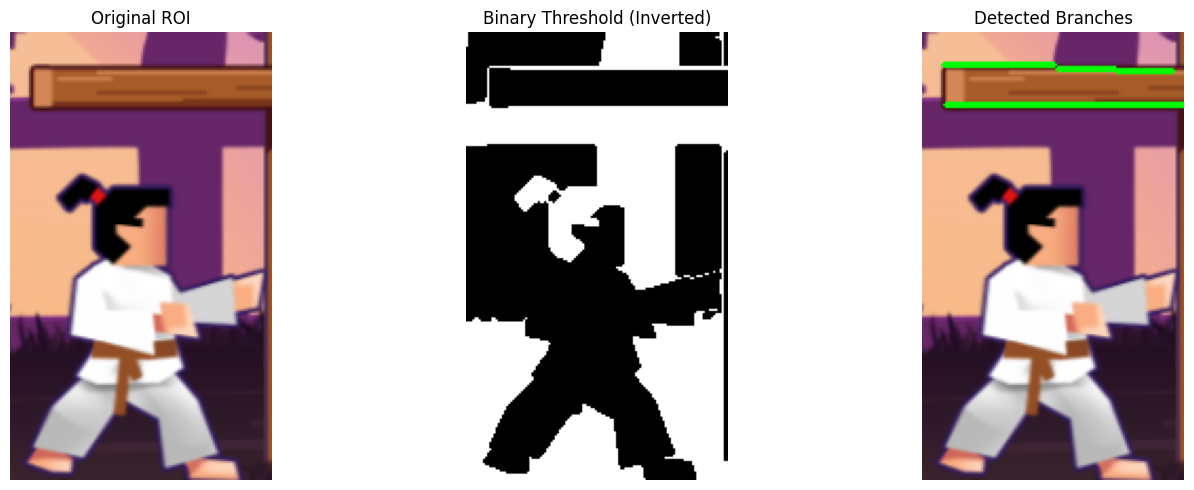

Branches Detected: [(11, 34, 123, 34), (64, 17, 118, 18), (10, 15, 62, 15)]
True


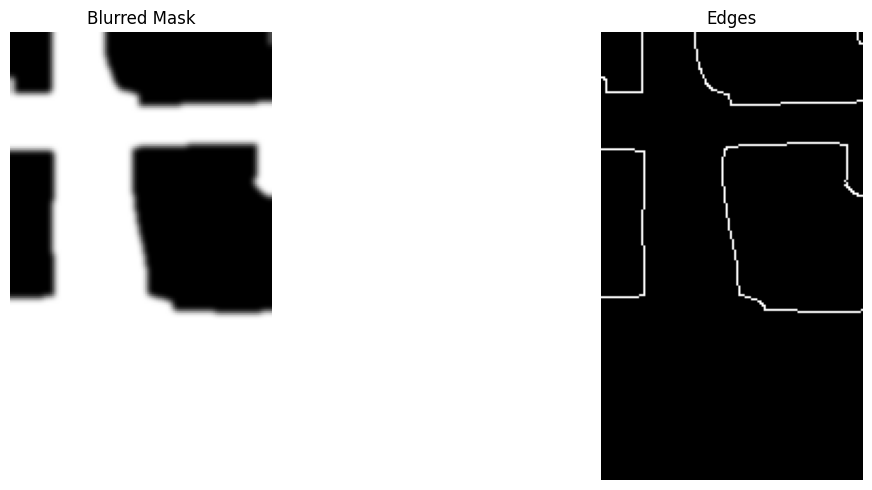

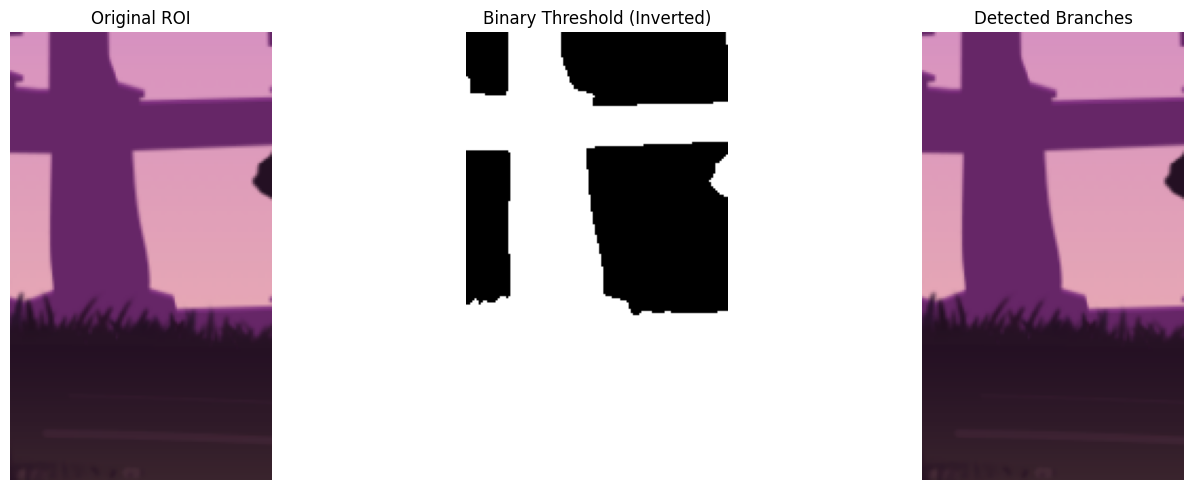

No branches detected.
False


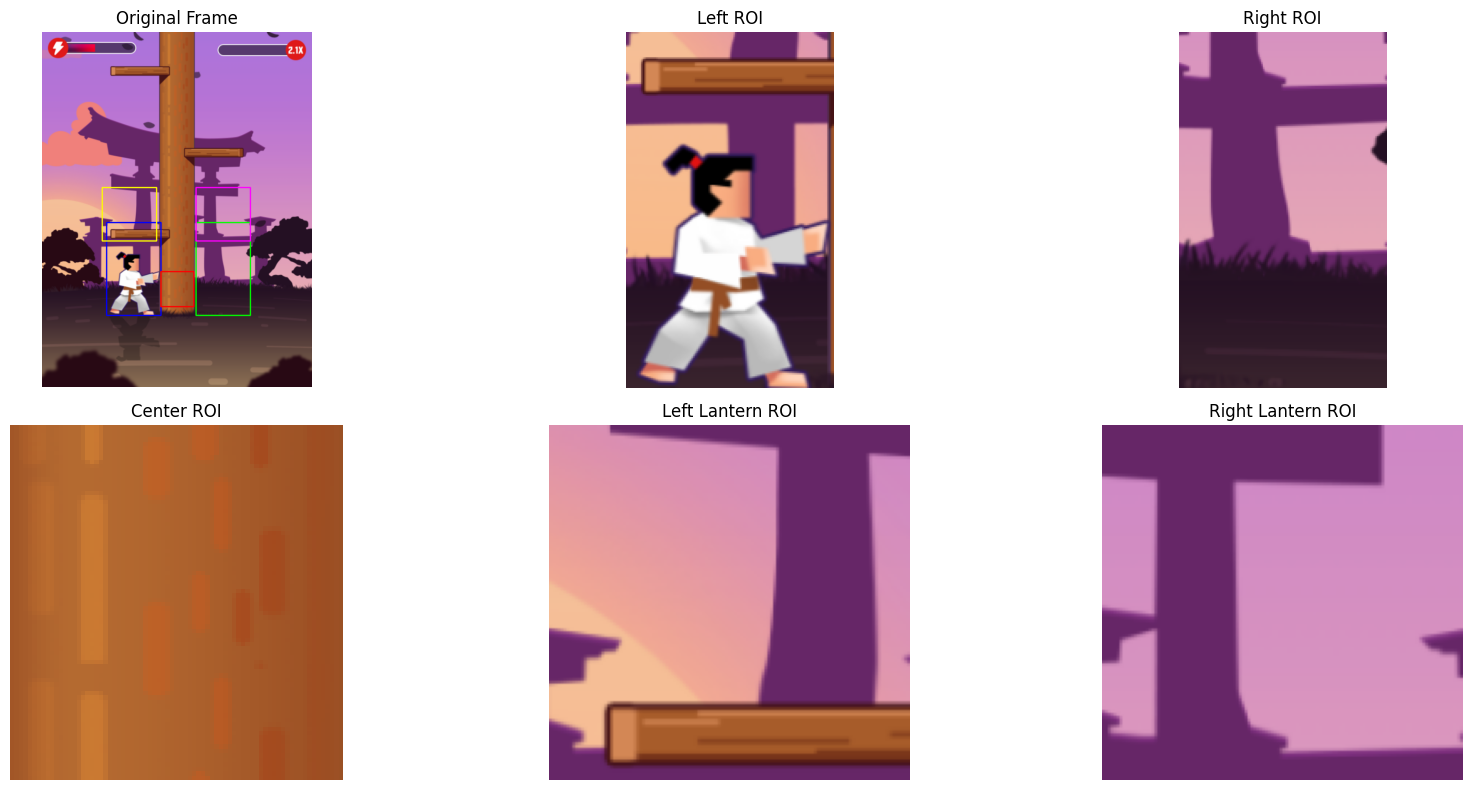

Processing frame 10...
Identified character: player3


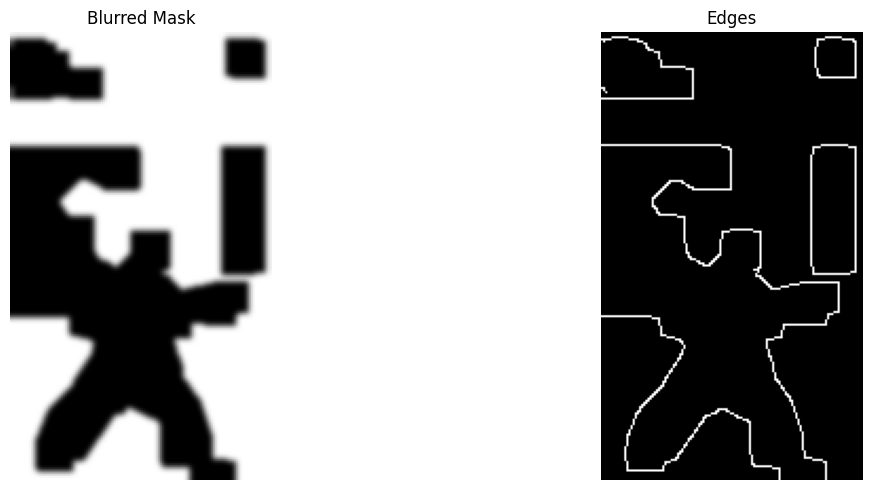

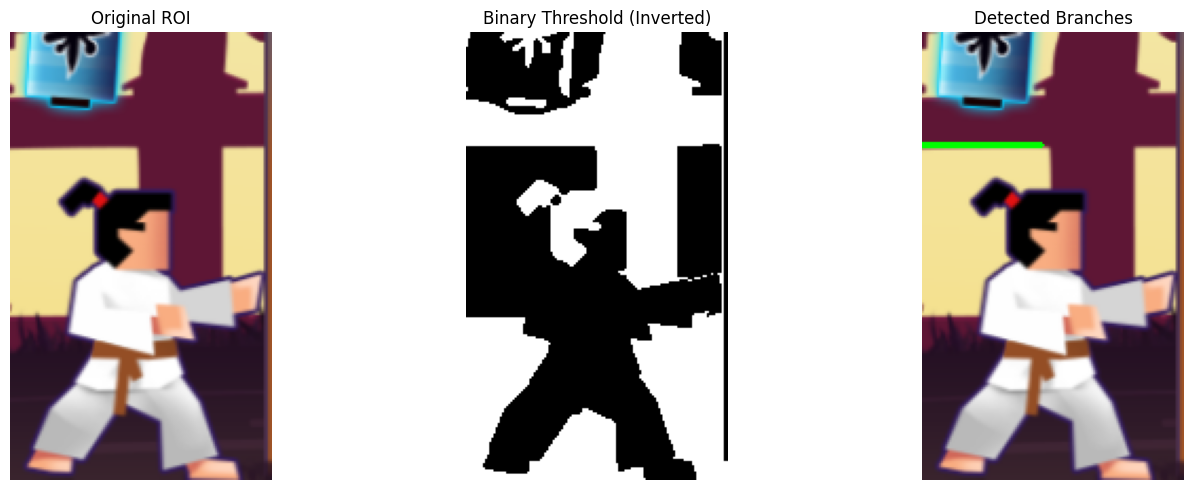

Branches Detected: [(0, 53, 56, 53)]
True


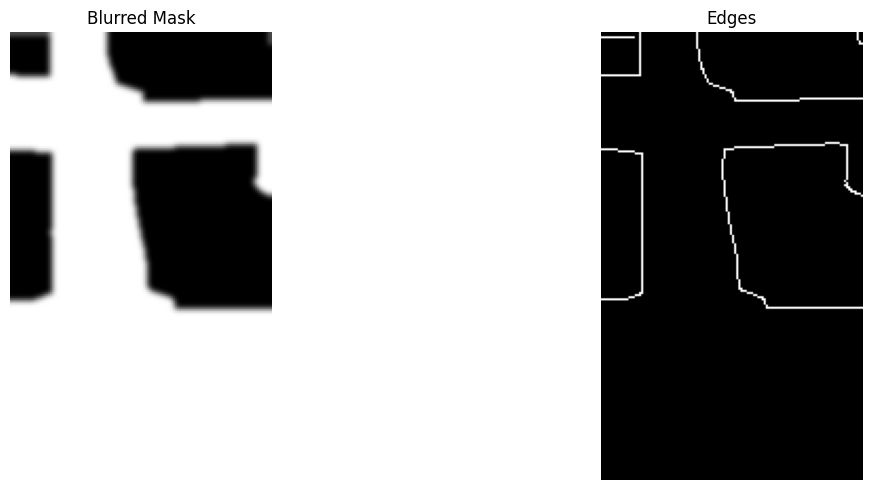

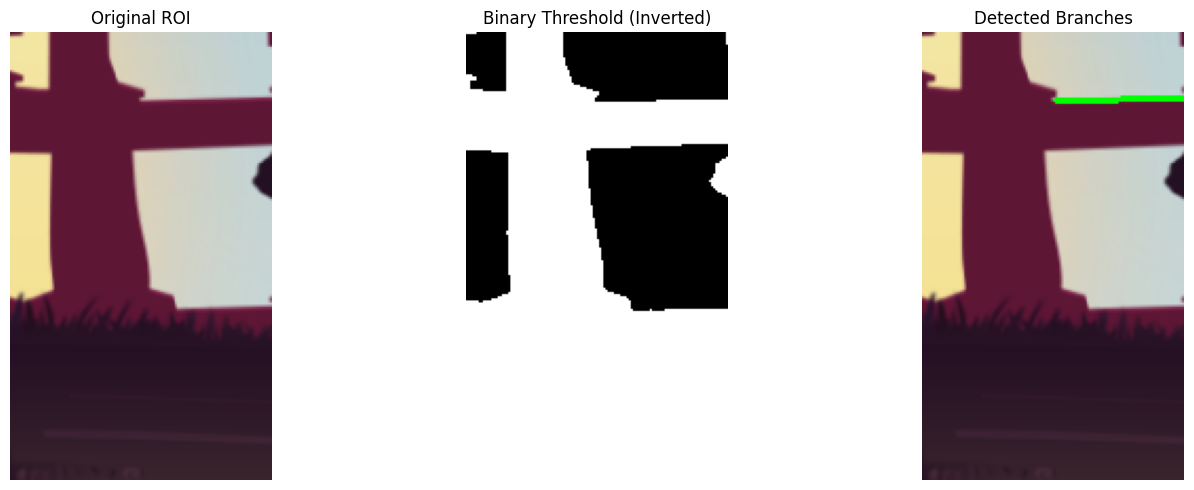

Branches Detected: [(63, 32, 123, 31)]
True


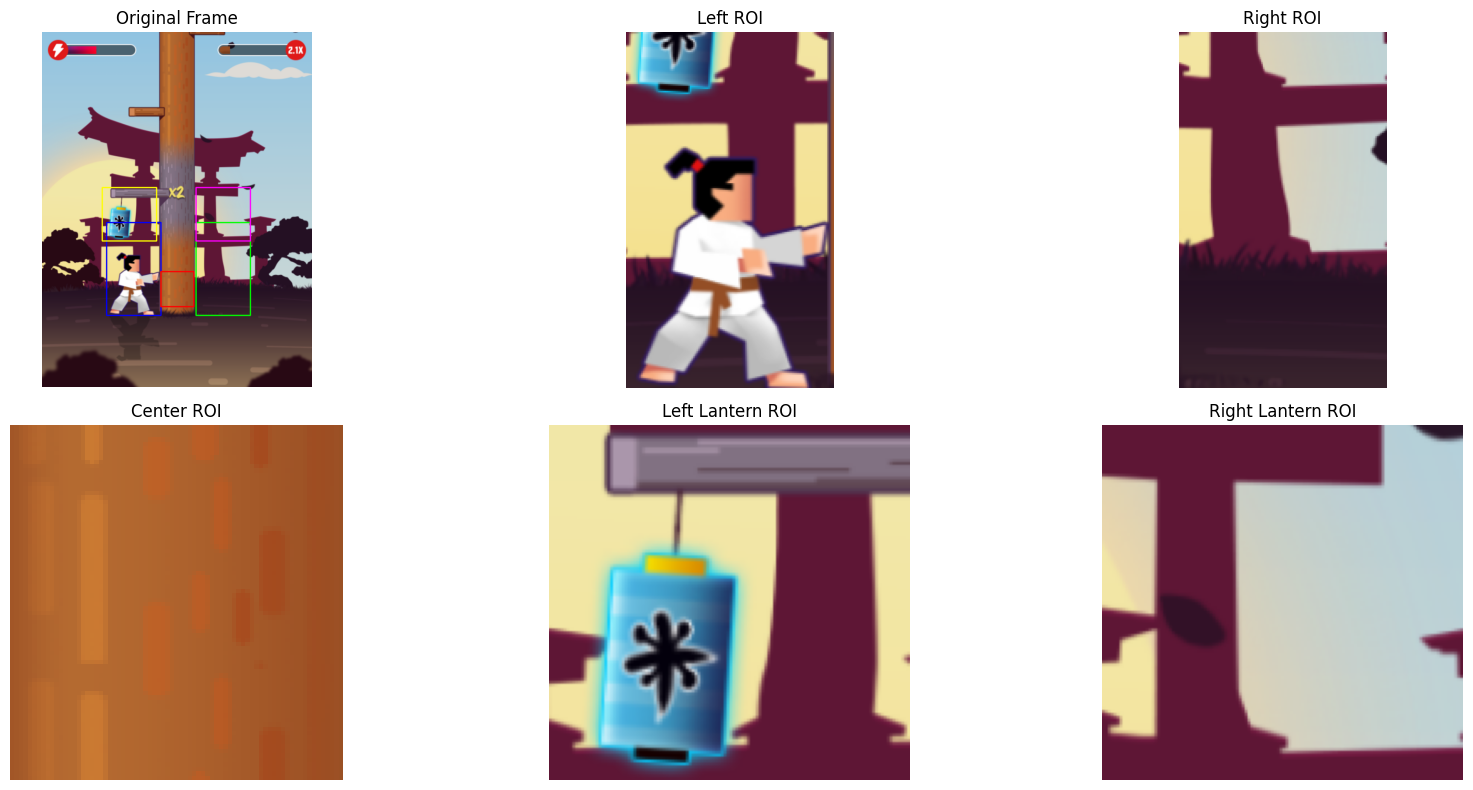

Processing frame 11...
Identified character: player3


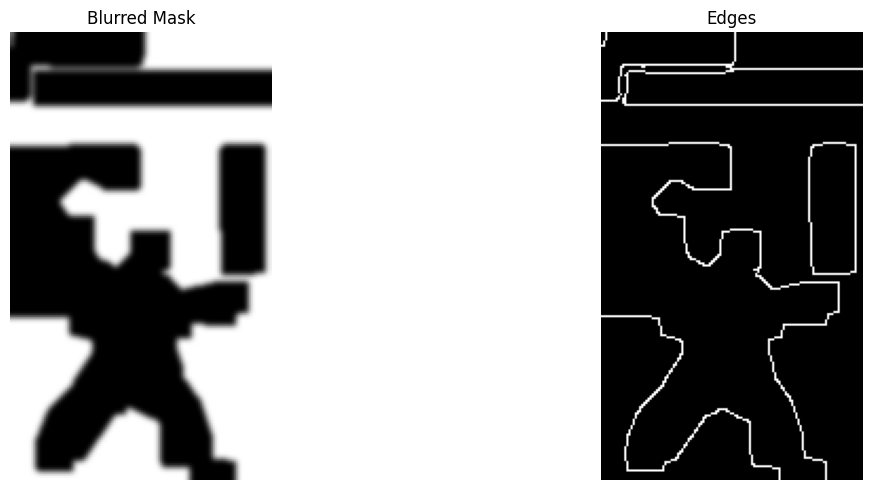

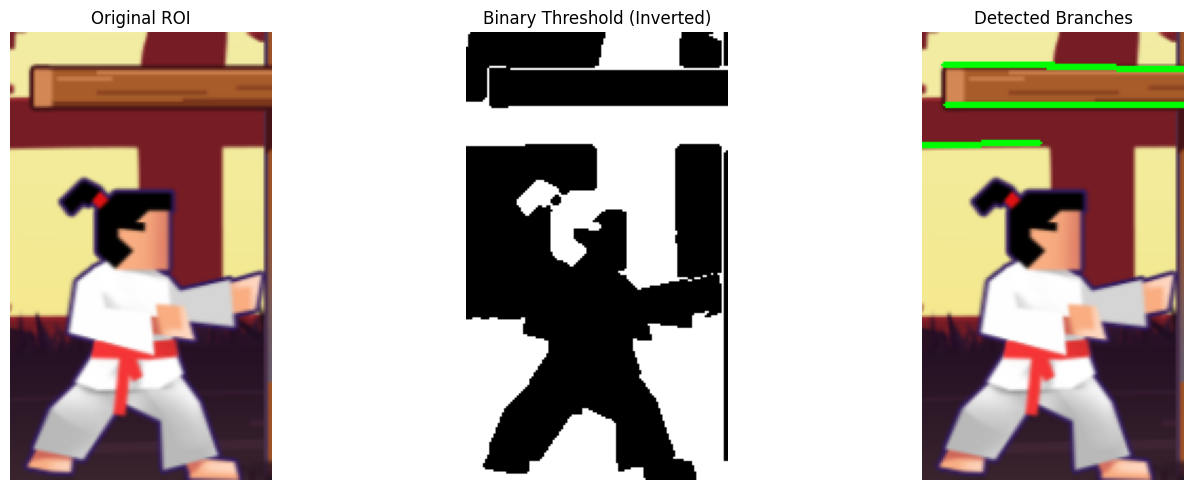

Branches Detected: [(11, 34, 123, 34), (59, 16, 123, 17), (0, 53, 55, 52), (10, 15, 62, 15)]
True


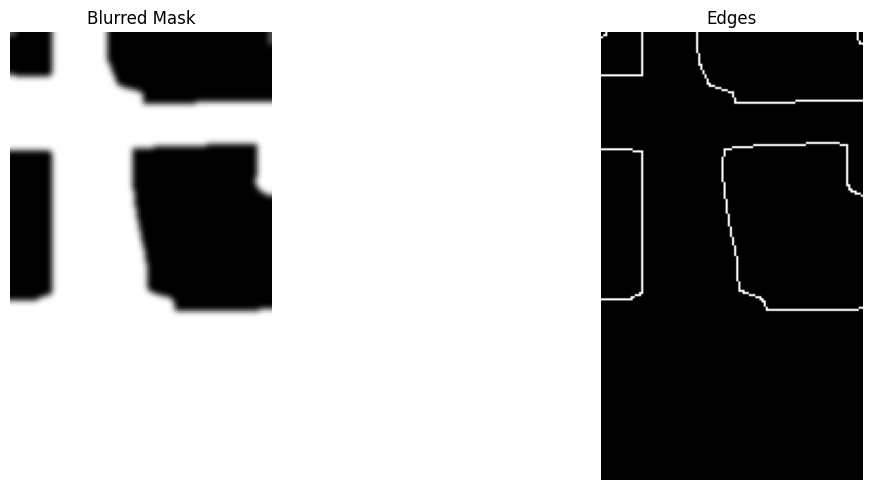

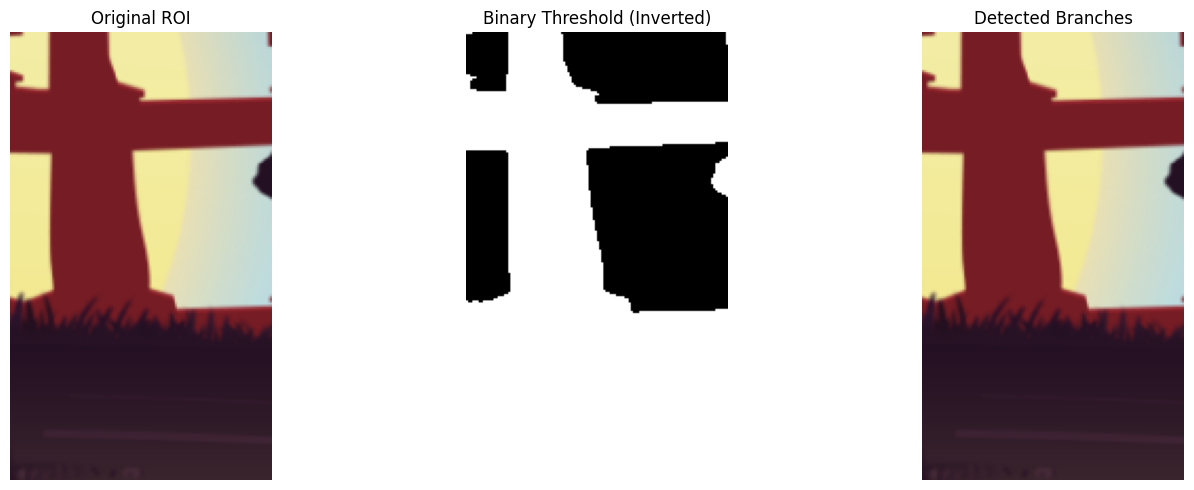

No branches detected.
False


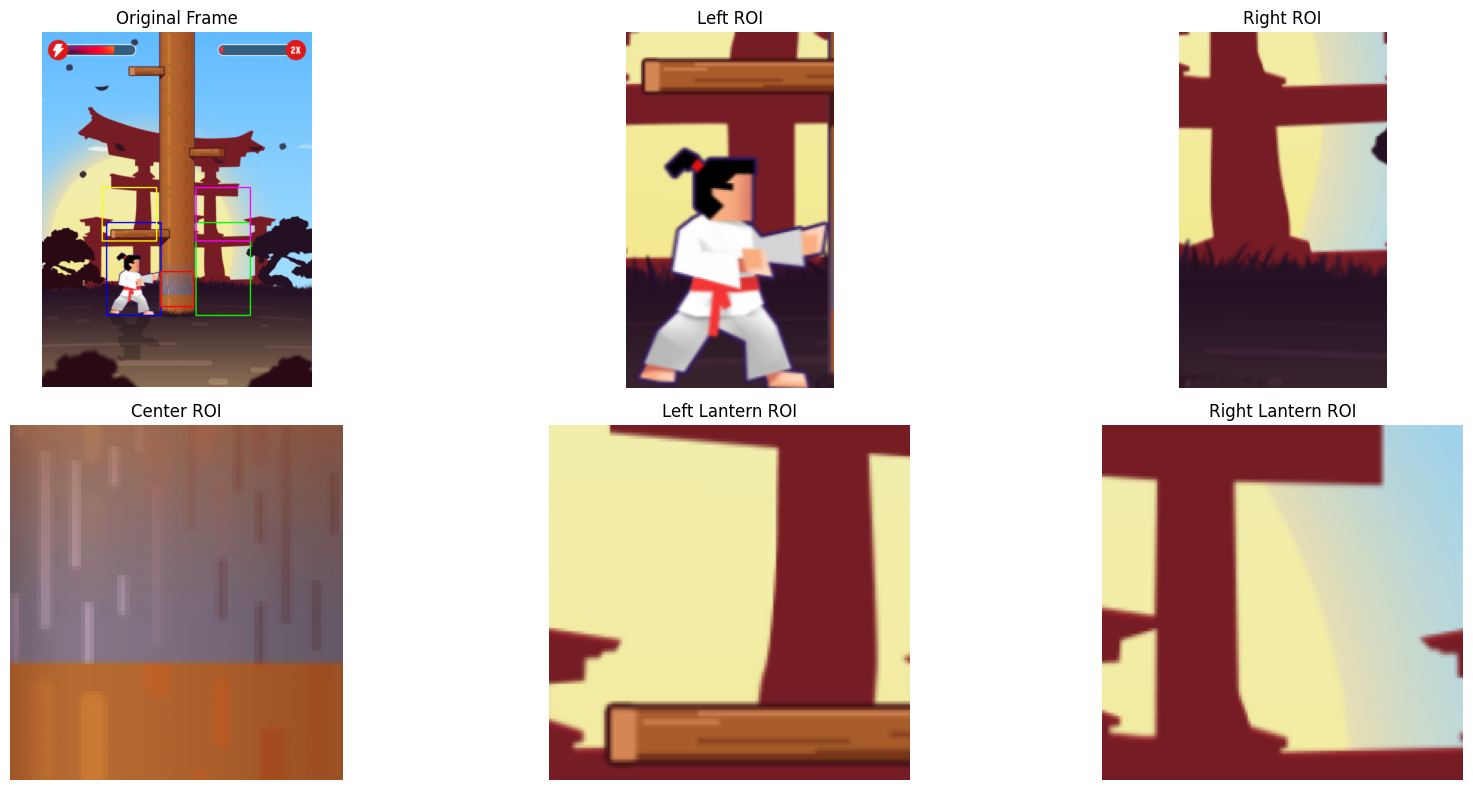

In [193]:
def process_frame(frame, characters):
    """
    Processes a single frame: identifies the character, defines ROIs, and visualizes the results.

    Parameters:
        frame (np.ndarray): The input frame.
        characters (dict): Dictionary of characters with templates and ROI functions.

    Returns:
        None
    """
    if frame is None:
        print("Error: Frame is None.")
        return

    # Identify the character
    identified_character = match_character_template(frame, characters)

    if identified_character:
        print(f"Identified character: {identified_character}")
        characters[identified_character]["roi_function"](frame, characters[identified_character]["template"])
    else:
        print("No character identified.")
        return

    # Extract ROIs
    img = frame.copy()
    x1, y1, w1, h1 = LEFT_ROI
    x2, y2, w2, h2 = RIGHT_ROI
    x3, y3, w3, h3 = CENTER_ROI
    x4, y4, w4, h4 = LEFT_LANTERN_ROI
    x5, y5, w5, h5 = RIGHT_LANTERN_ROI

    roi_region_left = img[y1:y1 + h1, x1:x1 + w1]
    roi_region_right = img[y2:y2 + h2, x2:x2 + w2]
    roi_region_center = img[y3:y3 + h3, x3:x3 + w3]
    roi_region_lantern_left = img[y4:y4 + h4, x4:x4 + w4]
    roi_region_lantern_right = img[y5:y5 + h5, x5:x5 + w5]

    print(detect_branches_in_roi_hough_new(frame, LEFT_ROI))
    print(detect_branches_in_roi_hough_new(frame, RIGHT_ROI))

    img_2 = img.copy()

    # Draw ROIs
    cv2.rectangle(img_2, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 0), 2)  # Left ROI
    cv2.rectangle(img_2, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)  # Right ROI
    cv2.rectangle(img_2, (x3, y3), (x3 + w3, y3 + h3), (0, 0, 255), 2)  # Center ROI
    cv2.rectangle(img_2, (x4, y4), (x4 + w4, y4 + h4), (0, 255, 255), 2)  # Left Lantern ROI
    cv2.rectangle(img_2, (x5, y5), (x5 + w5, y5 + h5), (255, 0, 255), 2)  # Right Lantern ROI

    # Visualization
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    ax[0, 0].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title("Original Frame")
    ax[0, 0].axis("off")

    ax[0, 1].imshow(cv2.cvtColor(roi_region_left, cv2.COLOR_BGR2RGB))
    ax[0, 1].set_title("Left ROI")
    ax[0, 1].axis("off")

    ax[0, 2].imshow(cv2.cvtColor(roi_region_right, cv2.COLOR_BGR2RGB))
    ax[0, 2].set_title("Right ROI")
    ax[0, 2].axis("off")

    ax[1, 0].imshow(cv2.cvtColor(roi_region_center, cv2.COLOR_BGR2RGB))
    ax[1, 0].set_title("Center ROI")
    ax[1, 0].axis("off")

    ax[1, 1].imshow(cv2.cvtColor(roi_region_lantern_left, cv2.COLOR_BGR2RGB))
    ax[1, 1].set_title("Left Lantern ROI")
    ax[1, 1].axis("off")

    ax[1, 2].imshow(cv2.cvtColor(roi_region_lantern_right, cv2.COLOR_BGR2RGB))
    ax[1, 2].set_title("Right Lantern ROI")
    ax[1, 2].axis("off")

    plt.tight_layout()
    plt.show()


# List of frames to process
frame_paths = [
    "saved_regions\game_region_20250107-214618.png",
    "saved_regions\game_region_20250107-161545.png",
    "saved_regions\game_region_20250107-161854.png",
    "saved_regions\game_region_20250107-161858.png",
    "saved_regions\game_region_20250107-195254.png",
    "saved_regions\game_region_20250107-195311.png",
    "saved_regions\game_region_20250107-195711.png",
    "saved_regions\game_region_20250107-195759.png",
    "saved_regions\game_region_20250107-195800.png",
    "saved_regions\game_region_20250107-195923.png",
    "saved_regions\game_region_20250107-195311.png",
]

frames = [cv2.imread(path) for path in frame_paths]

# Process each frame
for idx, frame in enumerate(frames):
    print(f"Processing frame {idx + 1}...")
    process_frame(frame, characters)
